In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
import scipy.stats as stats

sns.set_style('darkgrid')
pyo.init_notebook_mode()
%matplotlib inline


plt.rc('figure',figsize=(18,11))
sns.set_context('paper',font_scale=2)

In [2]:
## importing data
water_df = pd.read_csv('water_potability.csv')
water_df.head(5)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [3]:
water_df.shape

(3276, 10)

In [4]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df = water_df.copy()
df.head(5)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

# initial analysis

In [6]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

* From the above table, we can see that the count of each feature are not the same. so there must me some null values.
* Feature 'Solids' has the high mean and standard deviation comparted to other features.

In [7]:
#Portability 1 (good for Human)
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

In [8]:
# Portability is 0 (not good for Human)
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

* Mean and std of almost all features are similar for both samples. There are few differnces in Solids feature.

## checking for missing values

In [9]:
# counts of missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

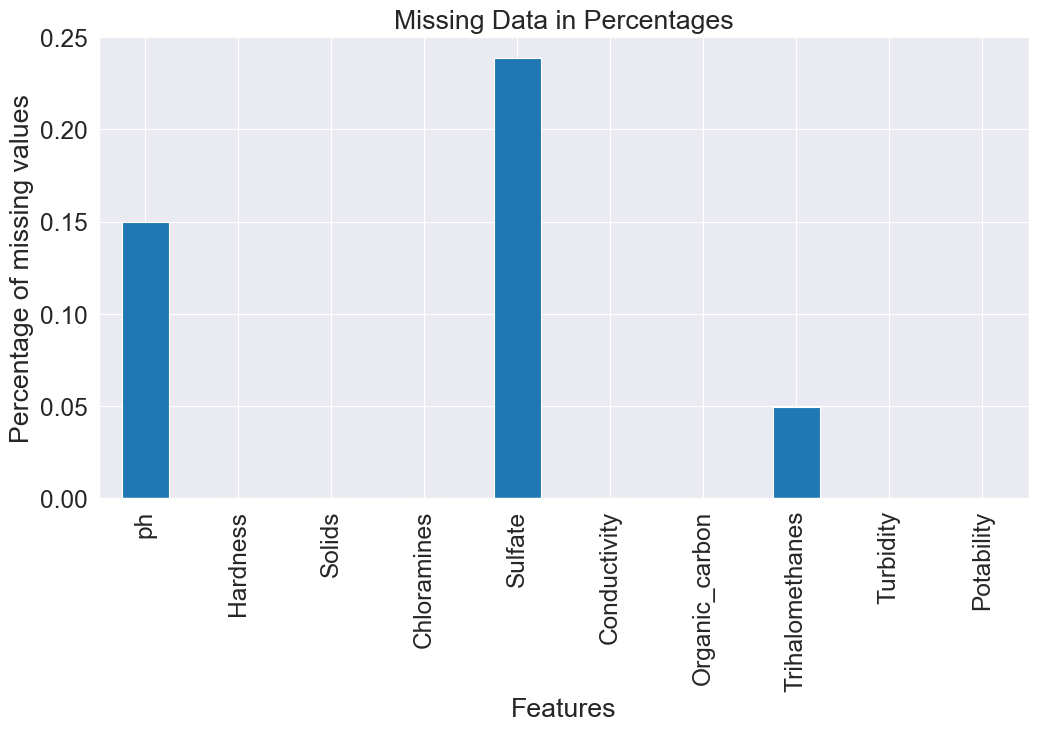

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [10]:
# percentages of missing values 
df.isnull().mean().plot.bar(figsize=(12,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages')
plt.show()

df.isnull().mean()*100 

In [11]:
import missingno as msno

# visualing the distribution of missing values
msno.matrix(df);

In [12]:
print('Percentage of missing values when potability = 0','\n\n', df[df['Potability']==0].isnull().mean() * 100)
print('\n Percentage of missing values when potability = 1','\n\n', df[df['Potability']==1].isnull().mean() * 100)

Percentage of missing values when potability = 0 

 ph                 15.715716
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            24.424424
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     5.355355
Turbidity           0.000000
Potability          0.000000
dtype: float64

 Percentage of missing values when potability = 1 

 ph                 13.849765
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            22.926448
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.303599
Turbidity           0.000000
Potability          0.000000
dtype: float64


### checking for duplicates

In [13]:
duplicate_values = sum(df.duplicated())
print('Duplicated observations =', duplicate_values)

Duplicated observations = 0


## Initial analysis 

In [14]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [15]:
data = [len(df[df['Potability']== 1]), len(df[df['Potability']== 0])]
keys = ['potable', 'not potable'] 
  
palette_color = sns.color_palette('bright') 
  
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%') 
  
plt.show() 

* **we have some degree of unbalancedness in our data**
* **we may have to use some upscalling technique on potable data to balance the classes**

## Univariate analysis

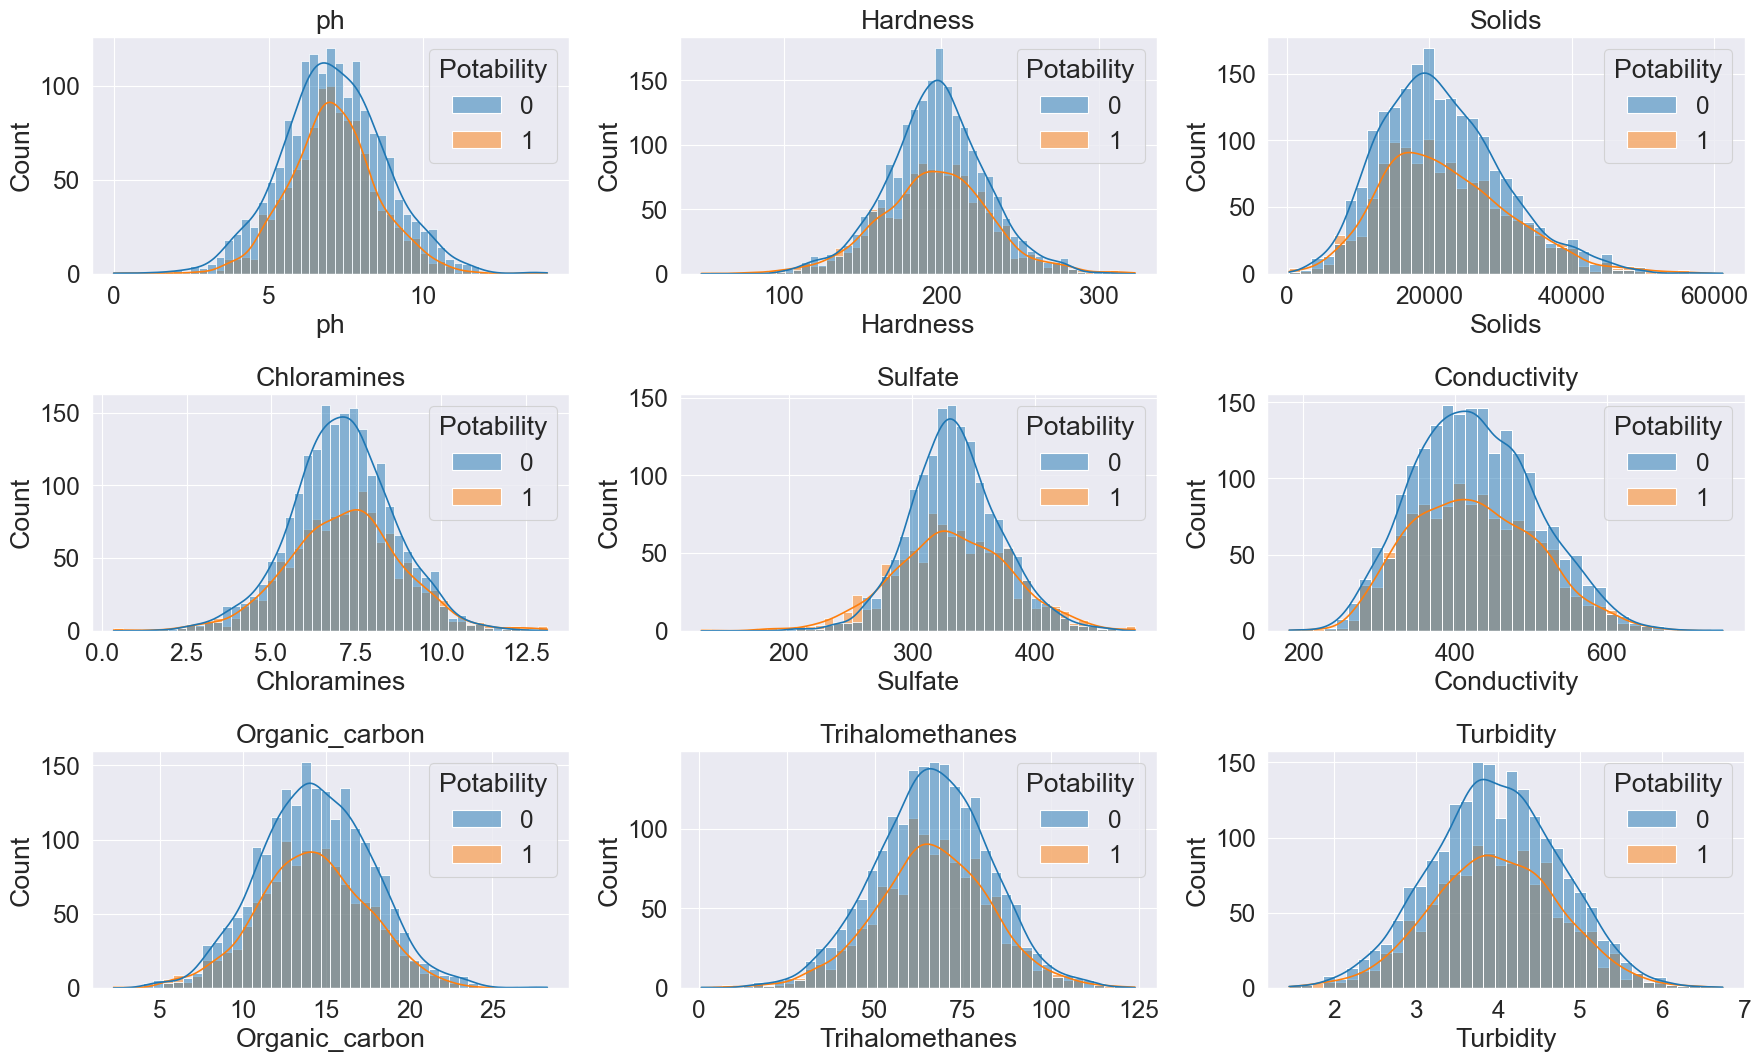

In [16]:
# histograms of each numerical variable
num_data = df.drop(['Potability'], axis = 1)
i = 0

fig = plt.figure()
for col in num_data.columns:
    plt.subplot(331+i)
    i = i+1
    sns.histplot(data = df, x = col, kde = True, color = '#fc5c3f', hue = 'Potability').set_title(col)
plt.tight_layout()
plt.show()

In [17]:
## function to check for the outliers
def removal_box_plot(df, column):
    plt.subplot(121)
    df_col = df[column].dropna()
    sns.boxplot(df_col)
    plt.title(f'Original Box Plot of {column}')

    # IQR
    Q1 = np.percentile(df_col, 25, method='midpoint')
    Q3 = np.percentile(df_col, 75, method='midpoint')
    IQR = Q3 - Q1

    # upper and lower limit of the Box-plot
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
 
    removed_outliers = df_col[(df_col <= upper) & (df_col >= lower)]

    plt.subplot(122)
    sns.boxplot(removed_outliers)
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    print('percentage of outliers: ', ((len(df_col) - len(removed_outliers)) / len(df_col)) * 100 , '%')

percentage of outliers:  1.6517055655296229 %


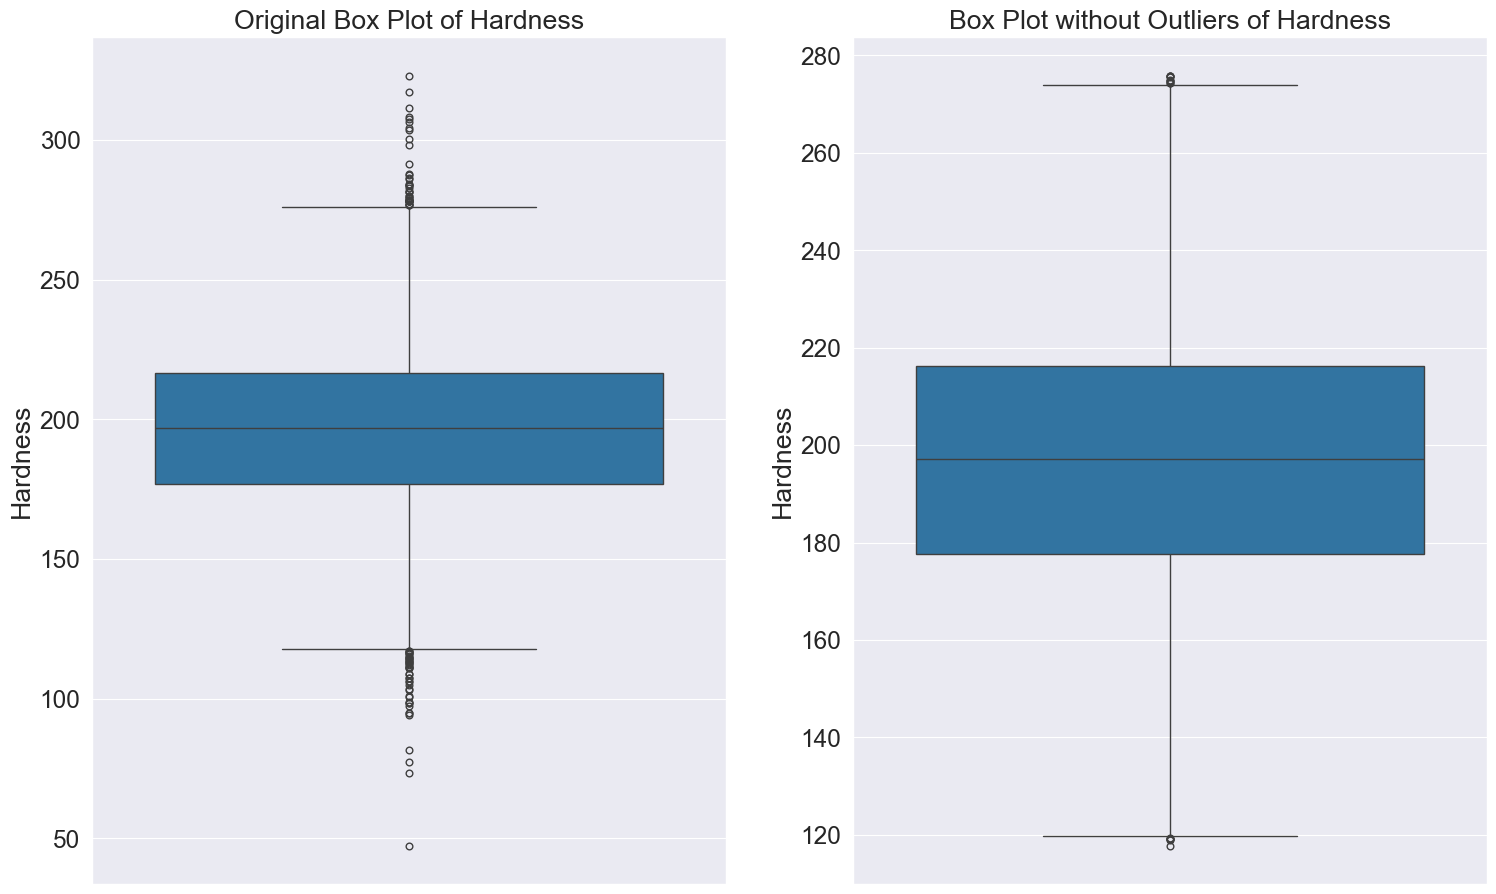

percentage of outliers:  2.5335775335775335 %


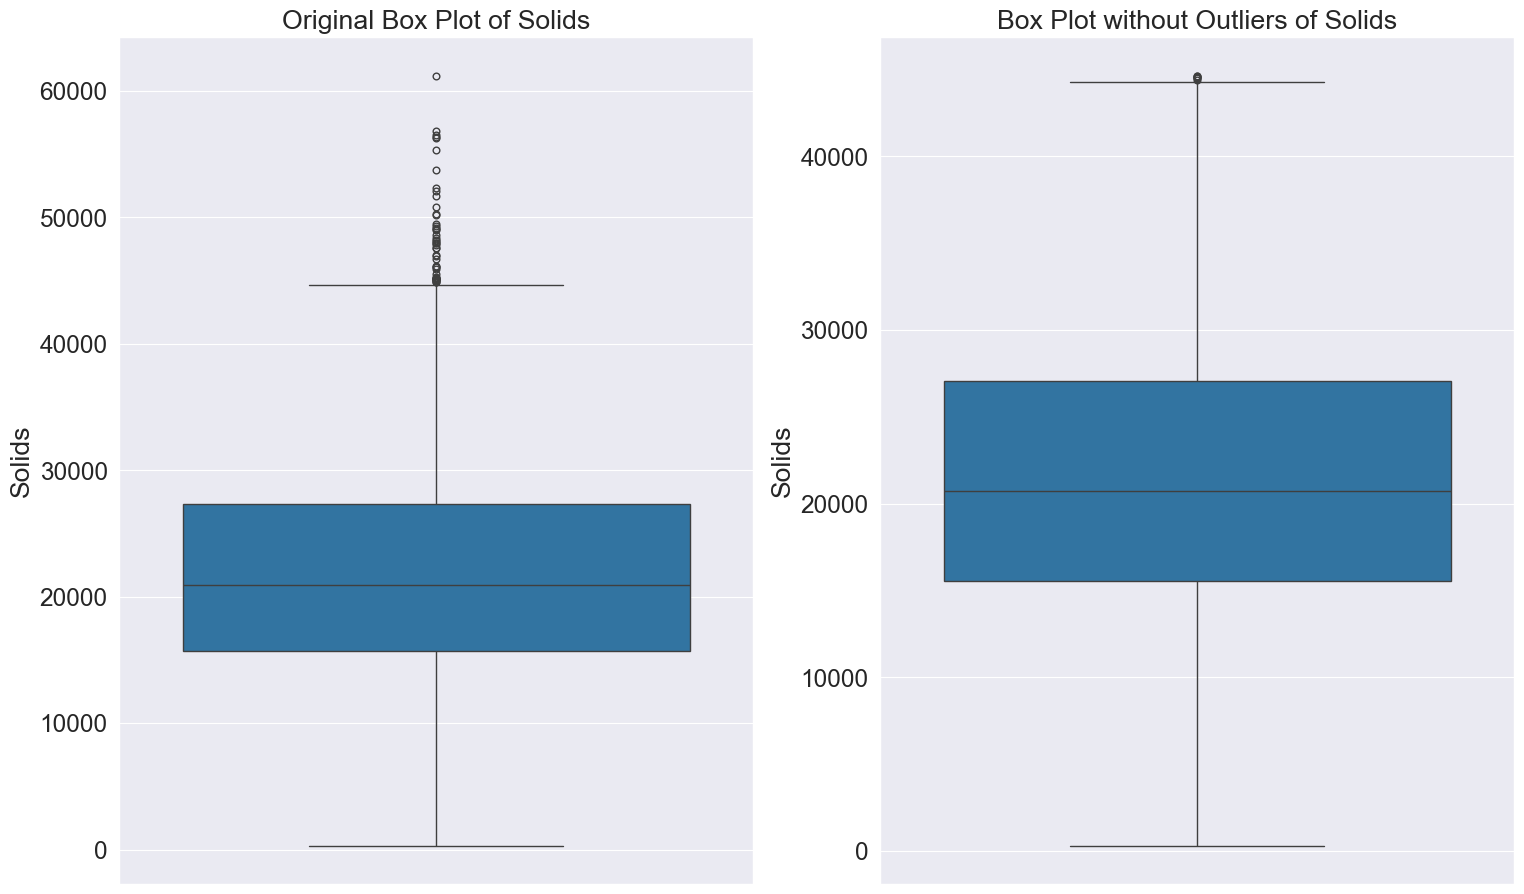

percentage of outliers:  1.4346764346764347 %


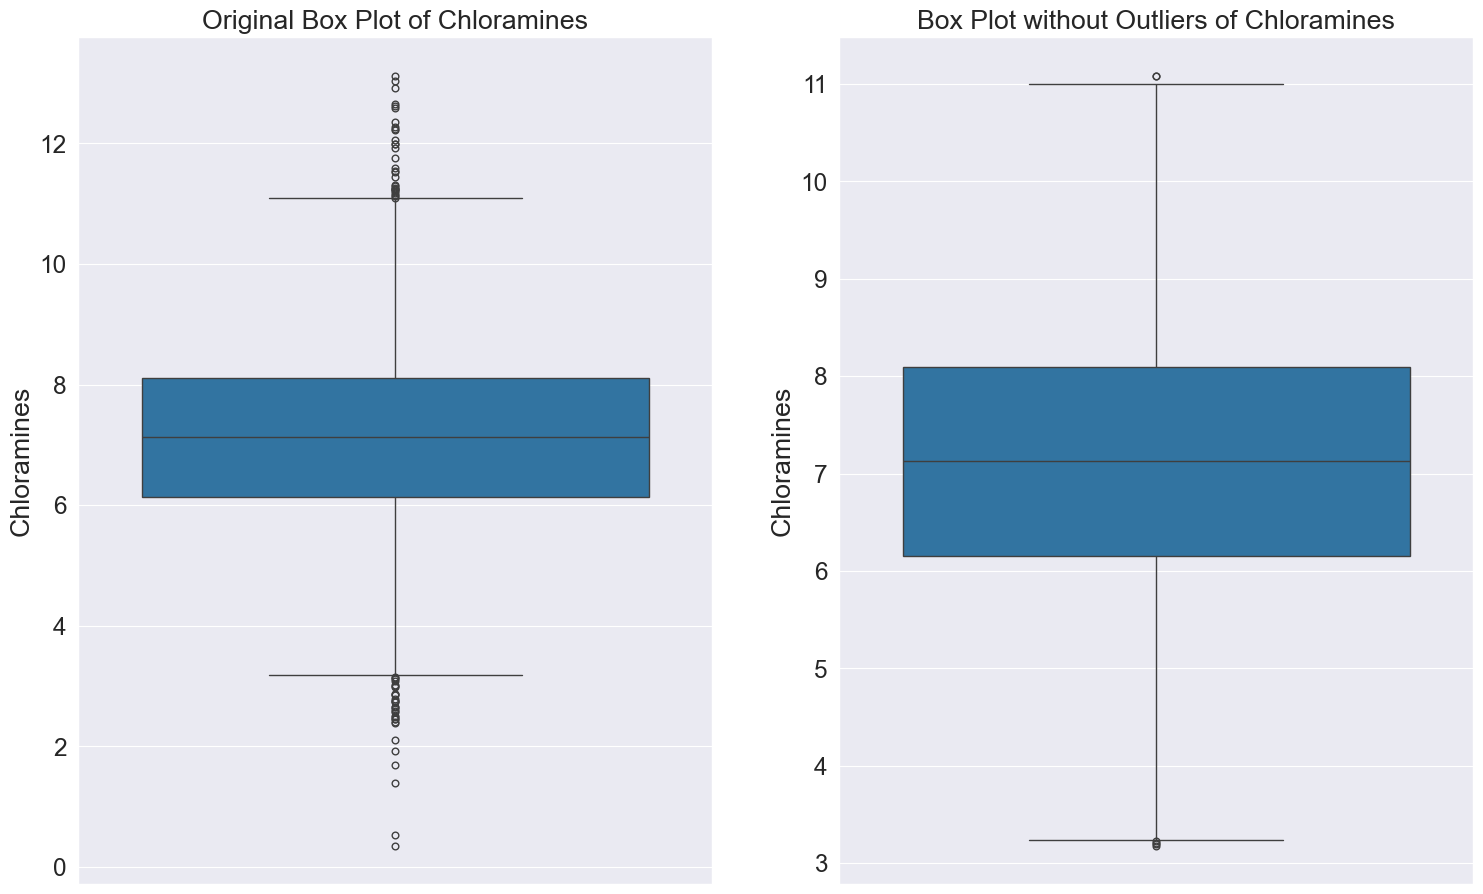

percentage of outliers:  1.862026862026862 %


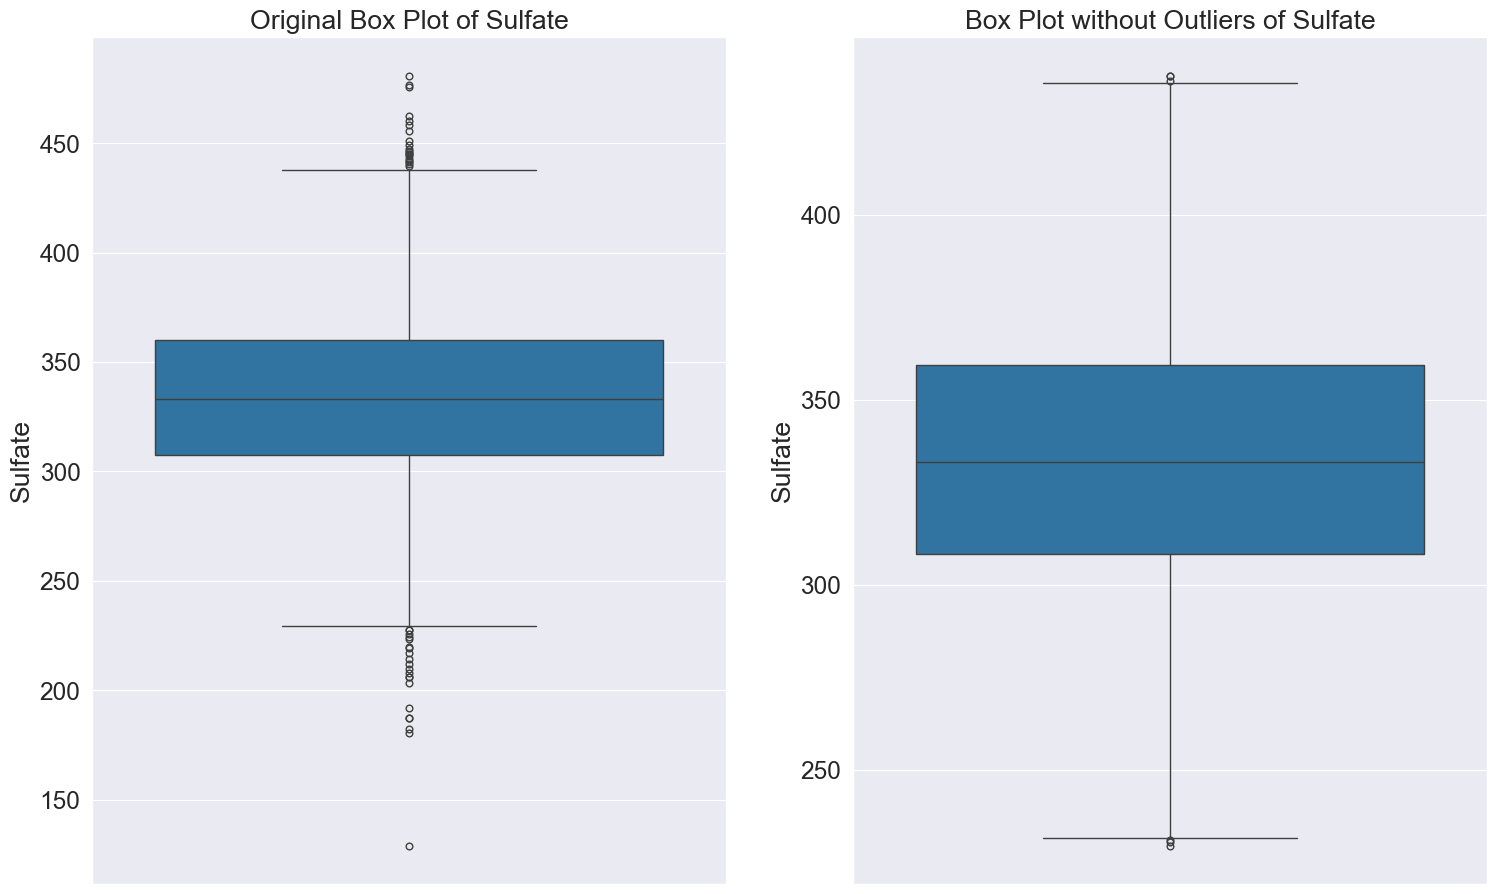

percentage of outliers:  1.6432865731462927 %


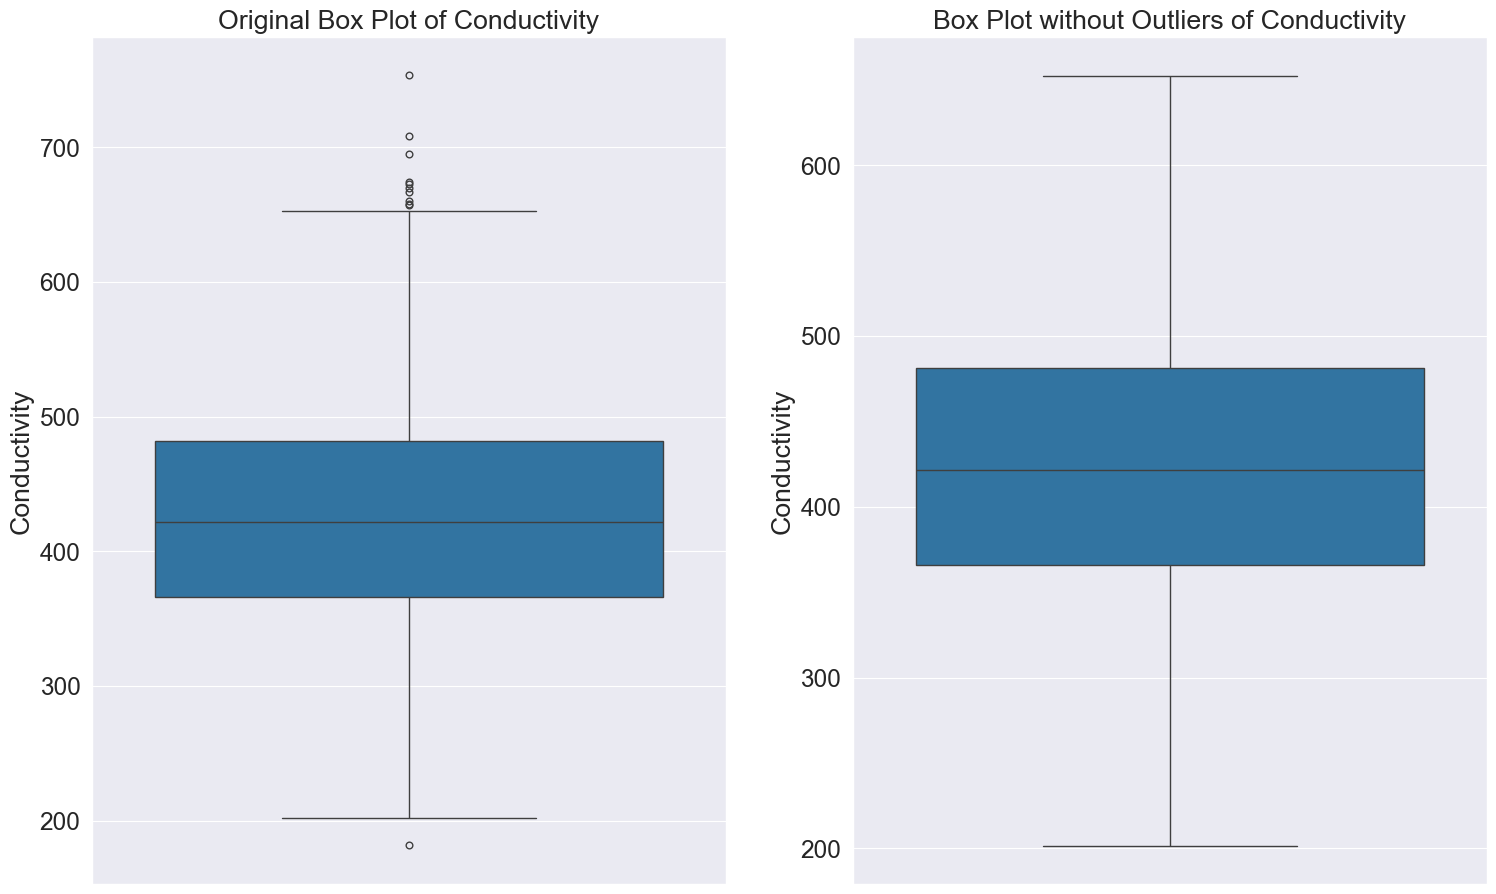

percentage of outliers:  0.3357753357753358 %


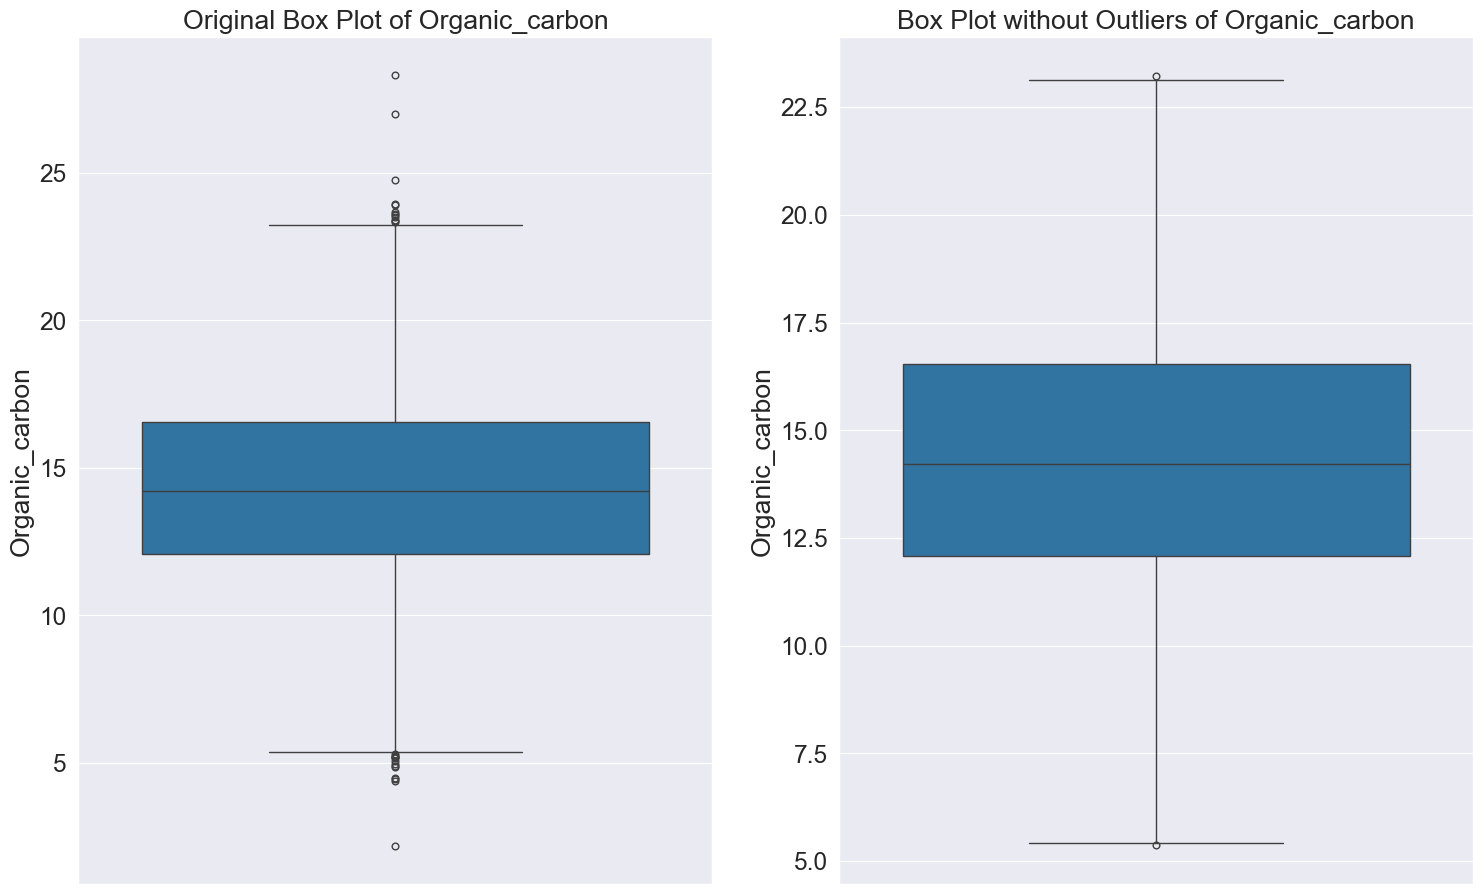

percentage of outliers:  0.7631257631257631 %


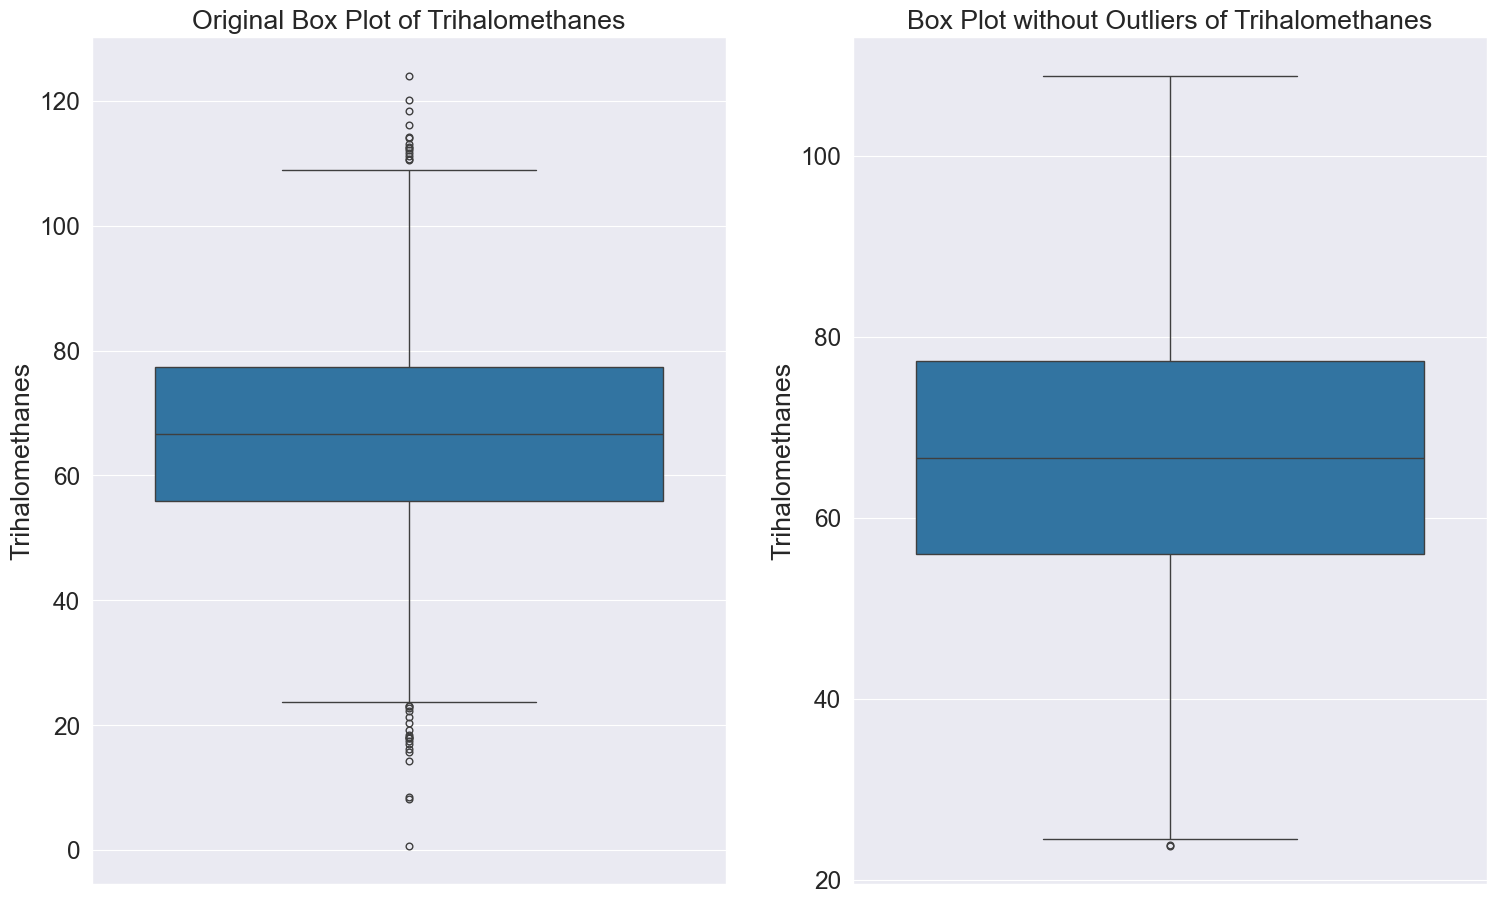

percentage of outliers:  1.0597302504816954 %


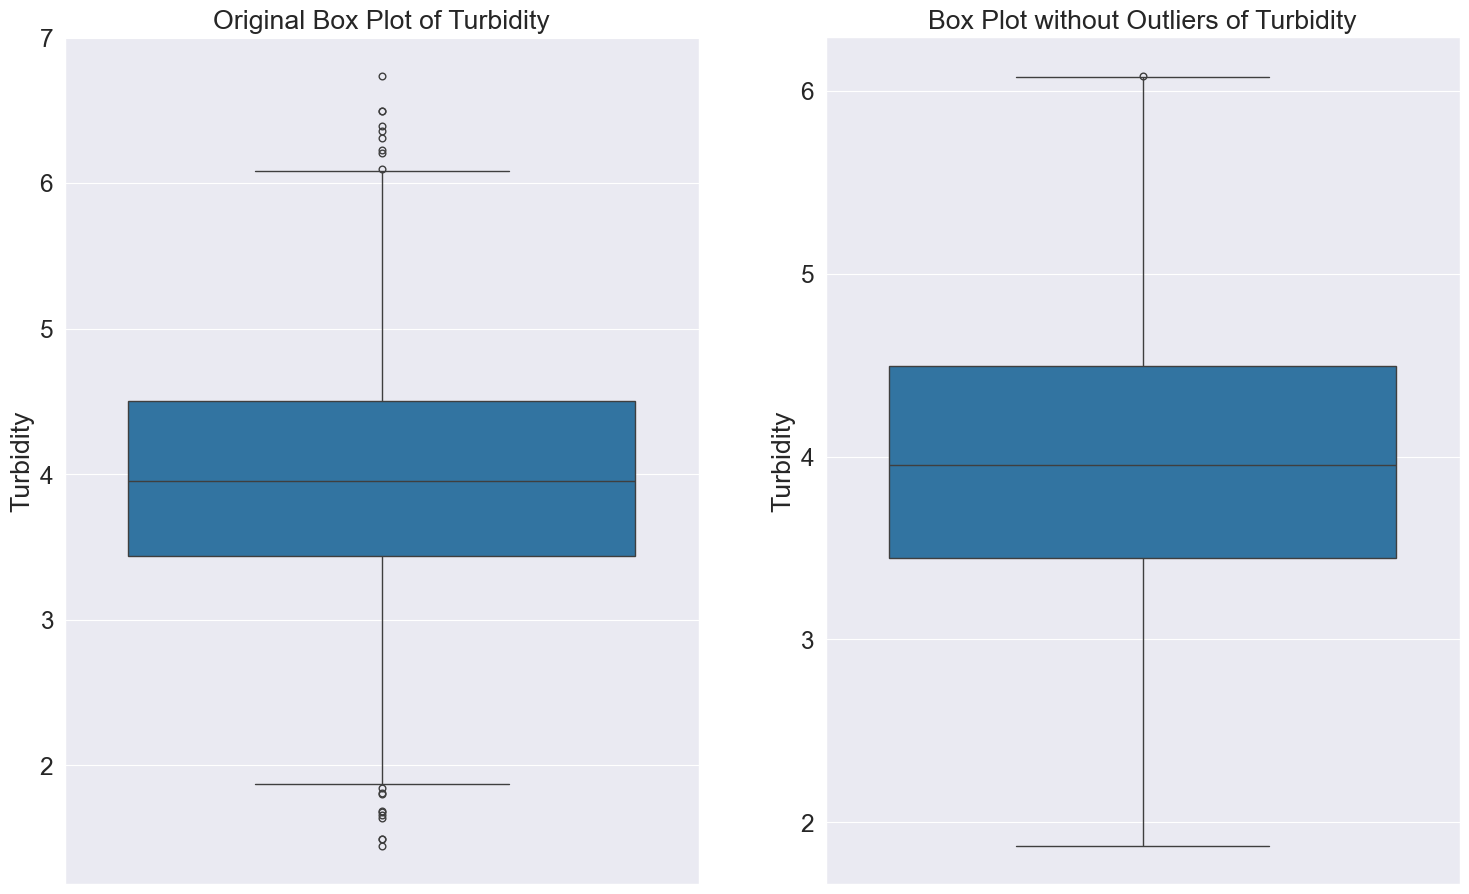

percentage of outliers:  0.57997557997558 %


In [18]:
# checking for outliers using boxplots in each numerical variable
for col in num_data.columns:
    removal_box_plot(df, col)

## Multivariate analysis

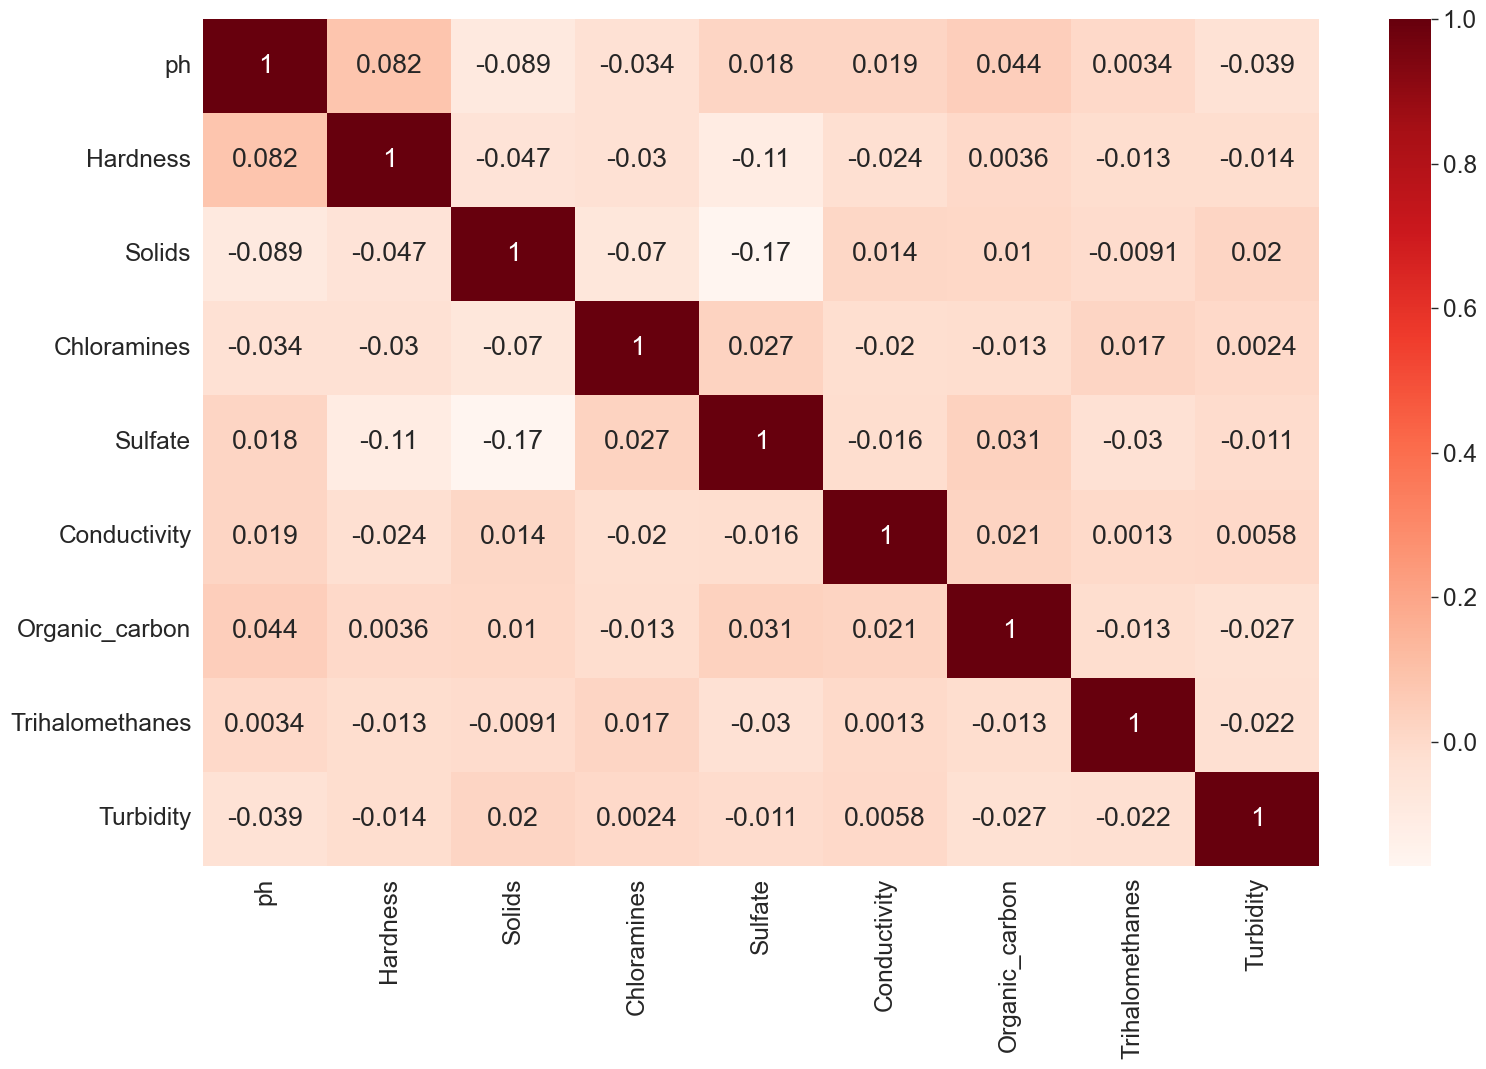

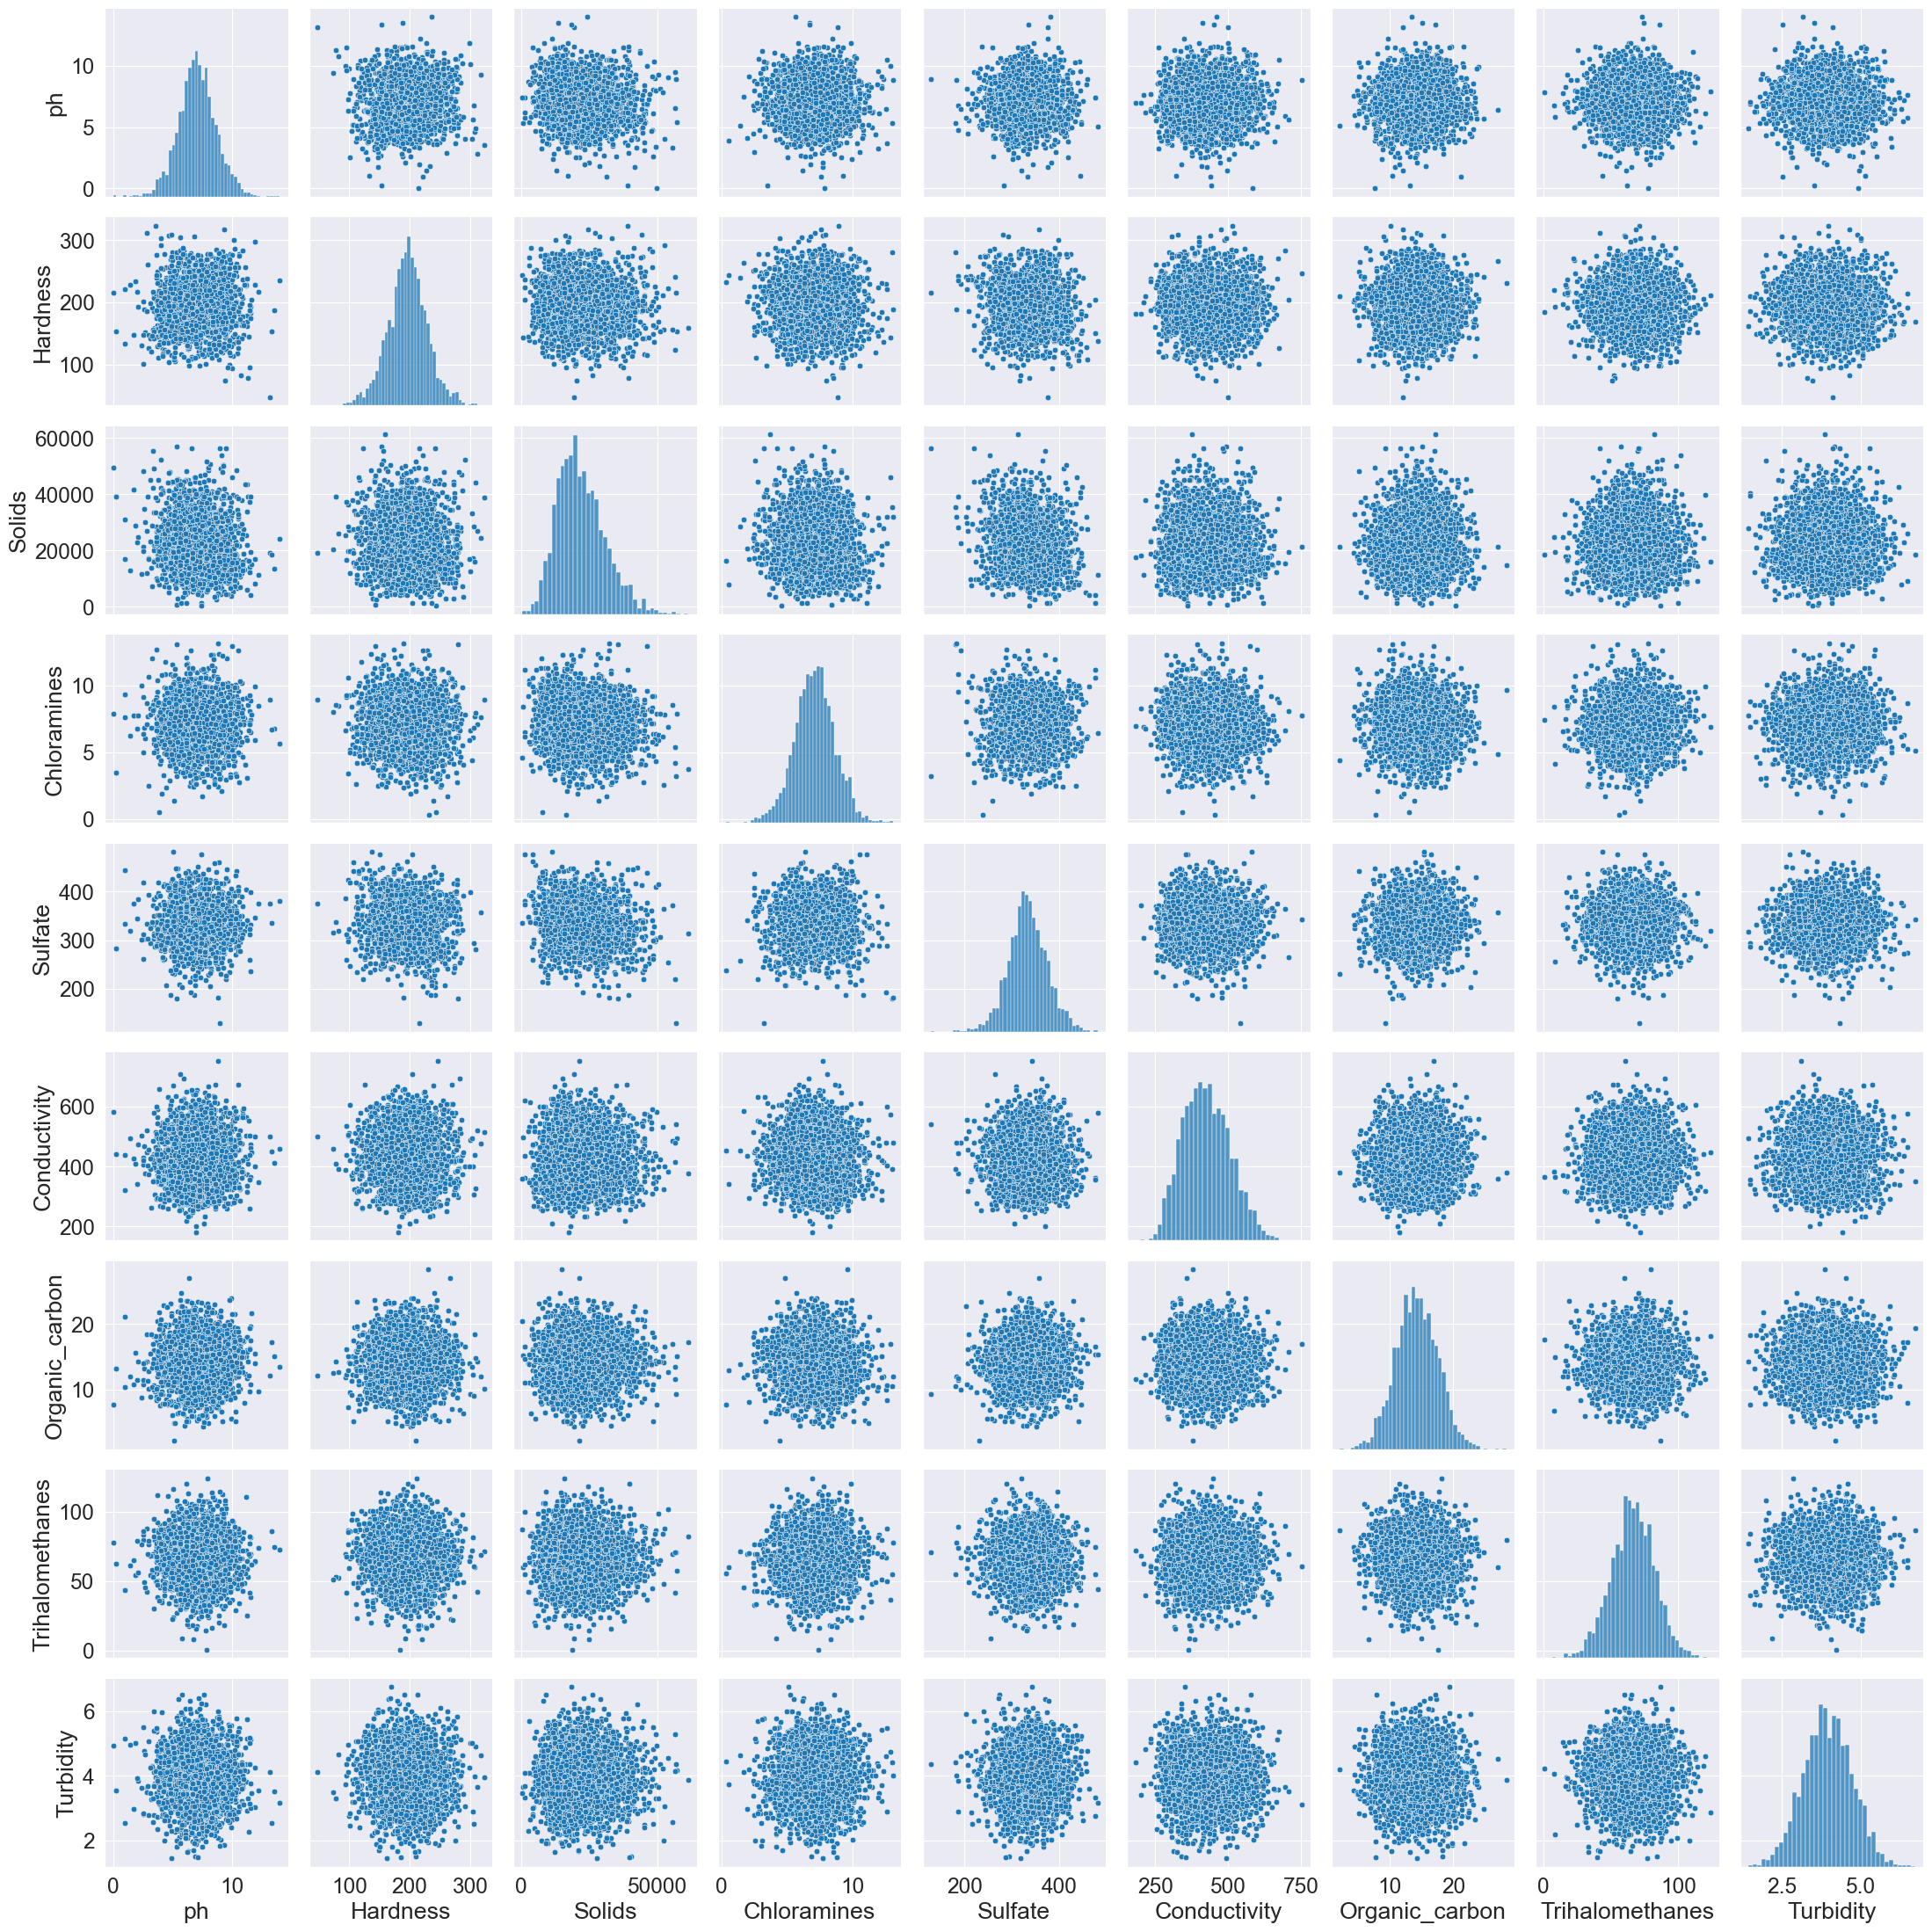

In [19]:
# checking the relationship between predictor variables
sns.heatmap(num_data.corr(), annot = True, cmap="Reds")
sns.pairplot(num_data)
plt.show()

* *relationship between predictor varaibles are very low, so we can assume that multicollinearity does not exsits.*

In [20]:
# relationship between response and the preditor variables
# using point-biserial correlation coefficient
from scipy.stats import pointbiserialr

point_biserial_corrs = []
for col in num_data.columns:
    print(col)
    df_temp = pd.concat([df['Potability'], num_data[col]], join='inner', axis=1).dropna()
    corr = pointbiserialr(df_temp['Potability'], df_temp[col]).correlation
    print('point biserial correlation with potability =', corr, '\n')

ph
point biserial correlation with potability = -0.003556461765168142 

Hardness
point biserial correlation with potability = -0.013836558085111372 

Solids
point biserial correlation with potability = 0.03374331339364981 

Chloramines
point biserial correlation with potability = 0.02377897199466951 

Sulfate
point biserial correlation with potability = -0.023577040191927485 

Conductivity
point biserial correlation with potability = -0.008128319721545443 

Organic_carbon
point biserial correlation with potability = -0.03000136661094455 

Trihalomethanes
point biserial correlation with potability = 0.007130401120661574 

Turbidity
point biserial correlation with potability = 0.0015806819539223131 



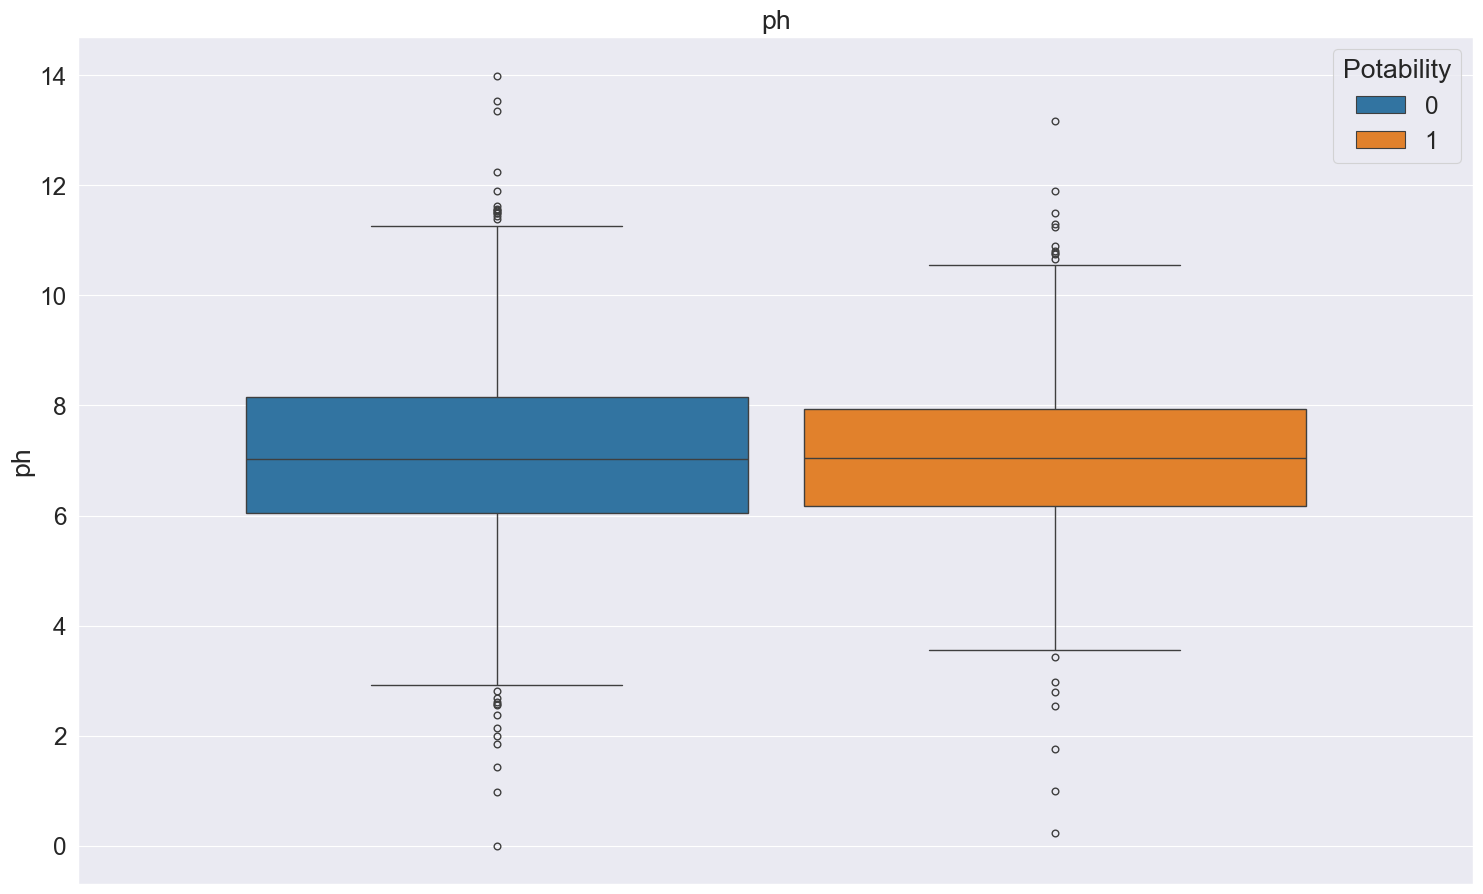

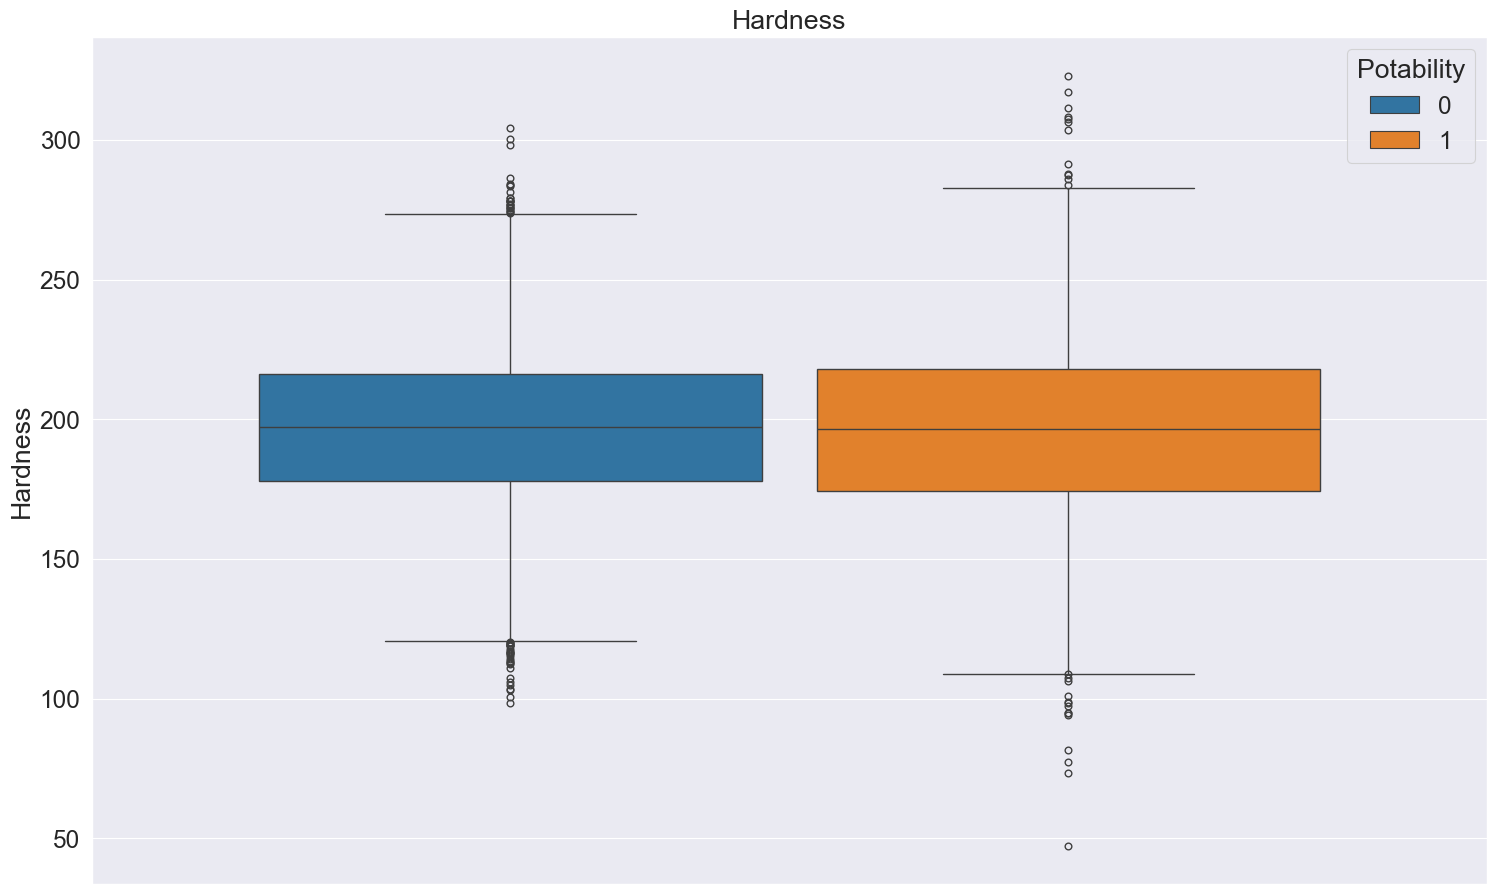

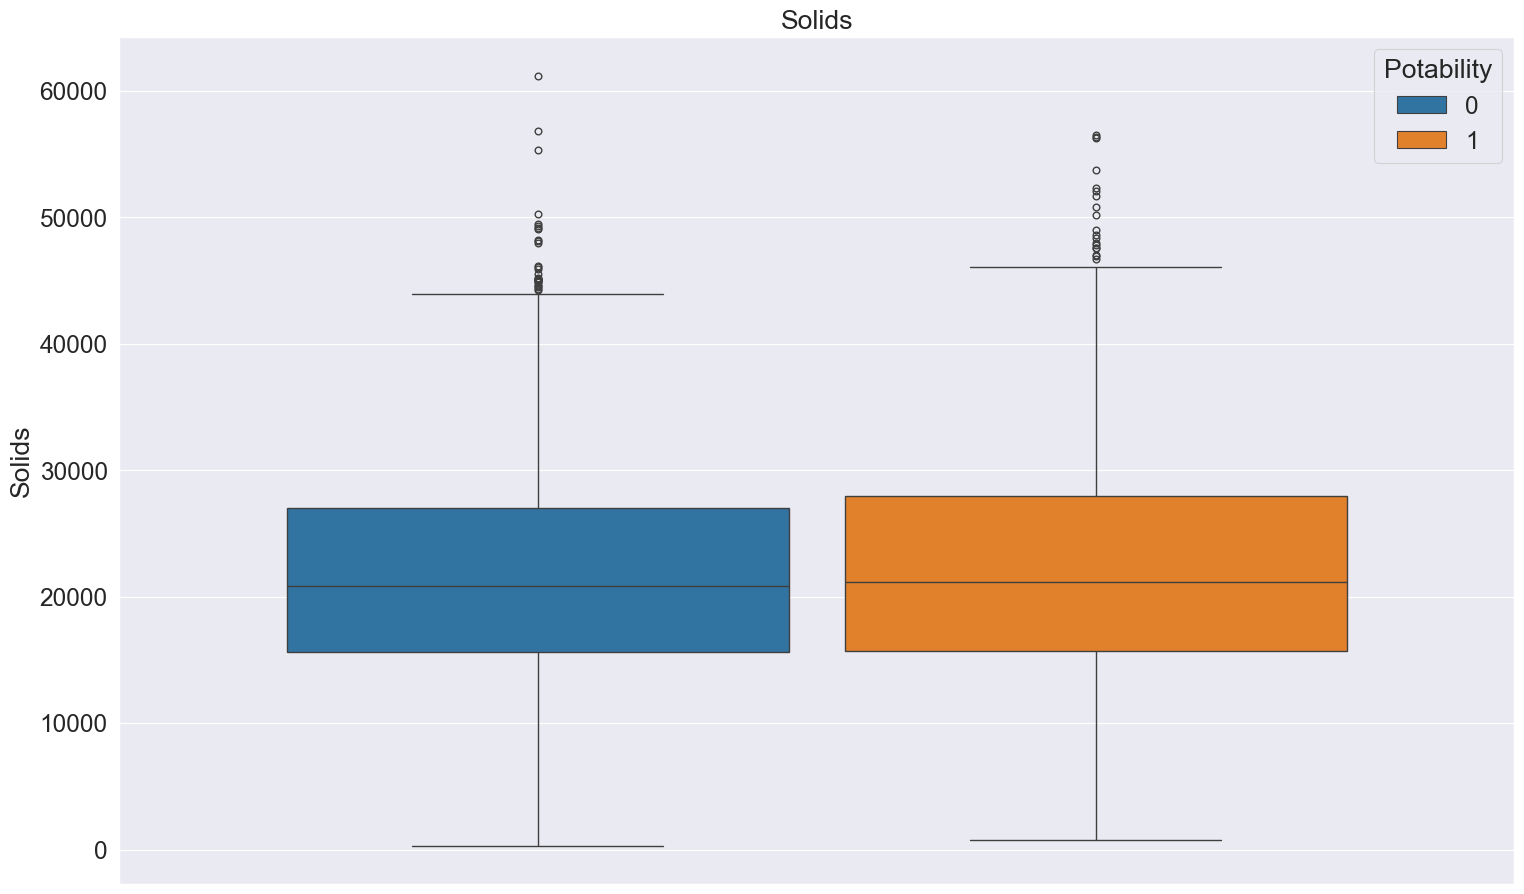

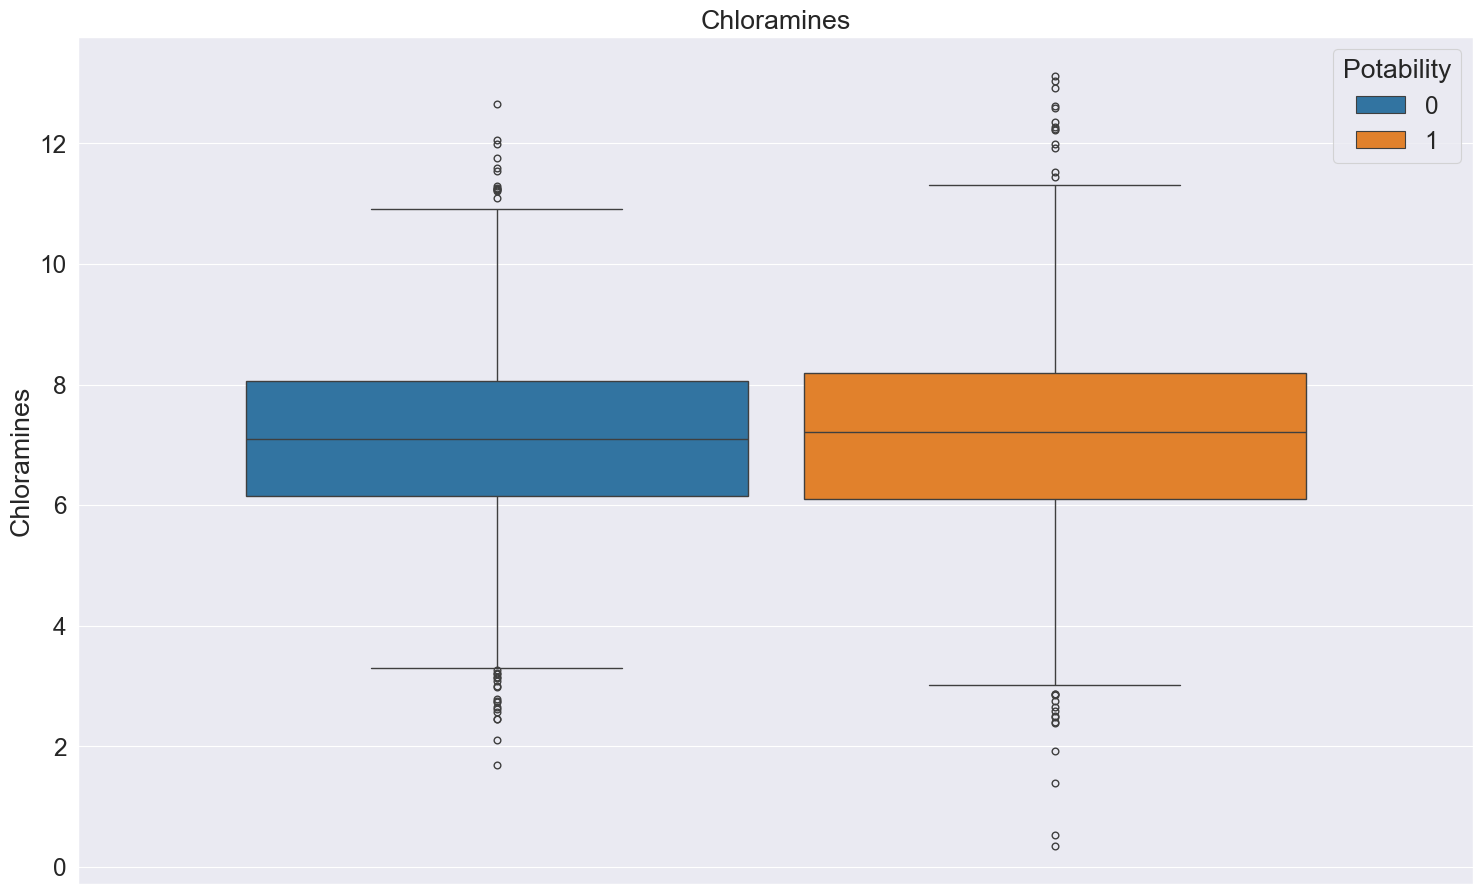

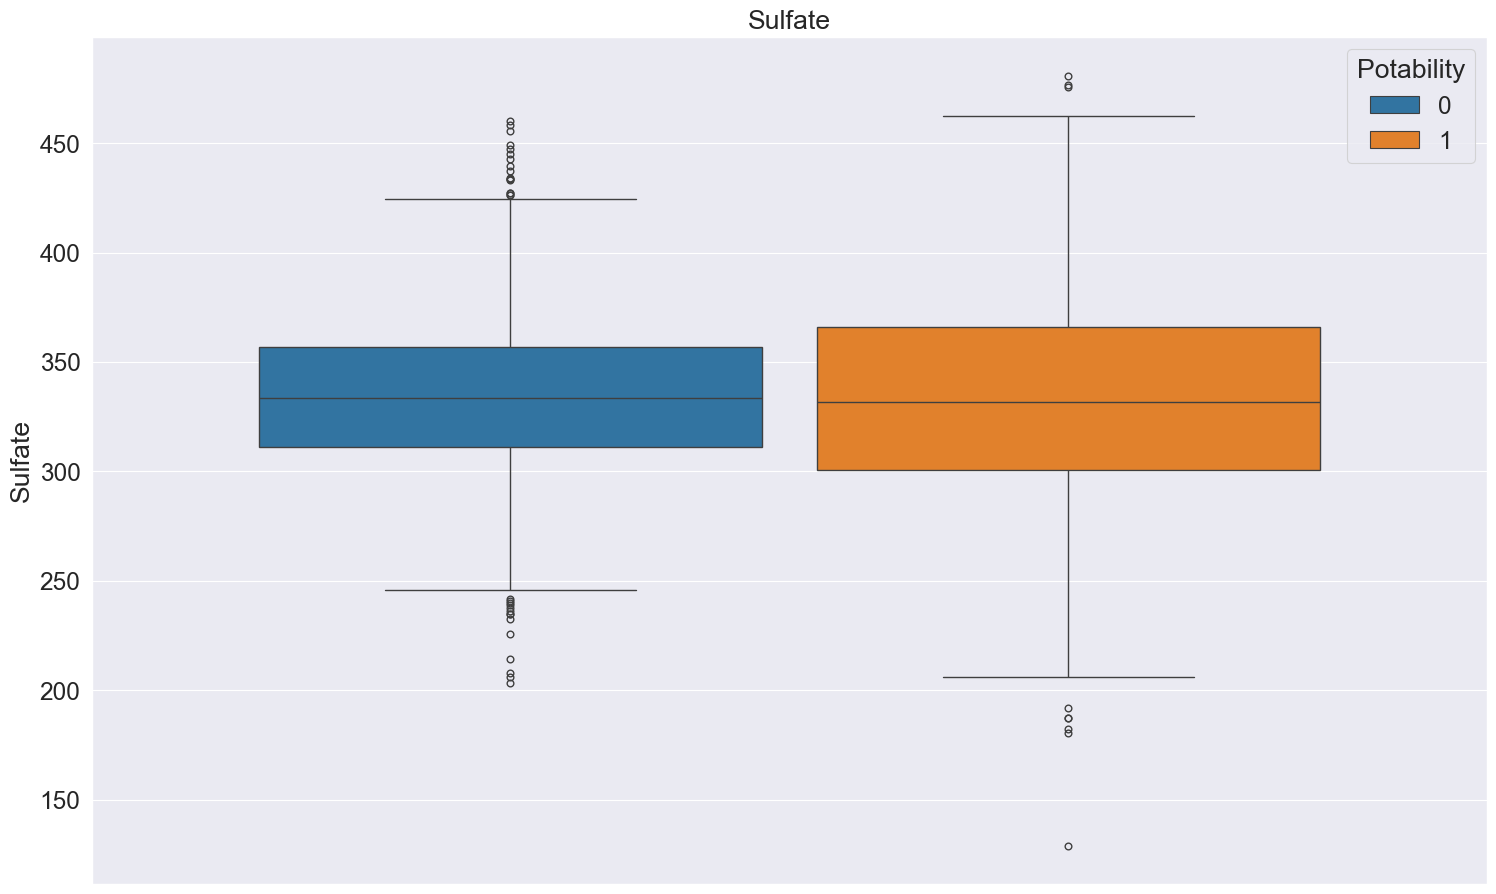

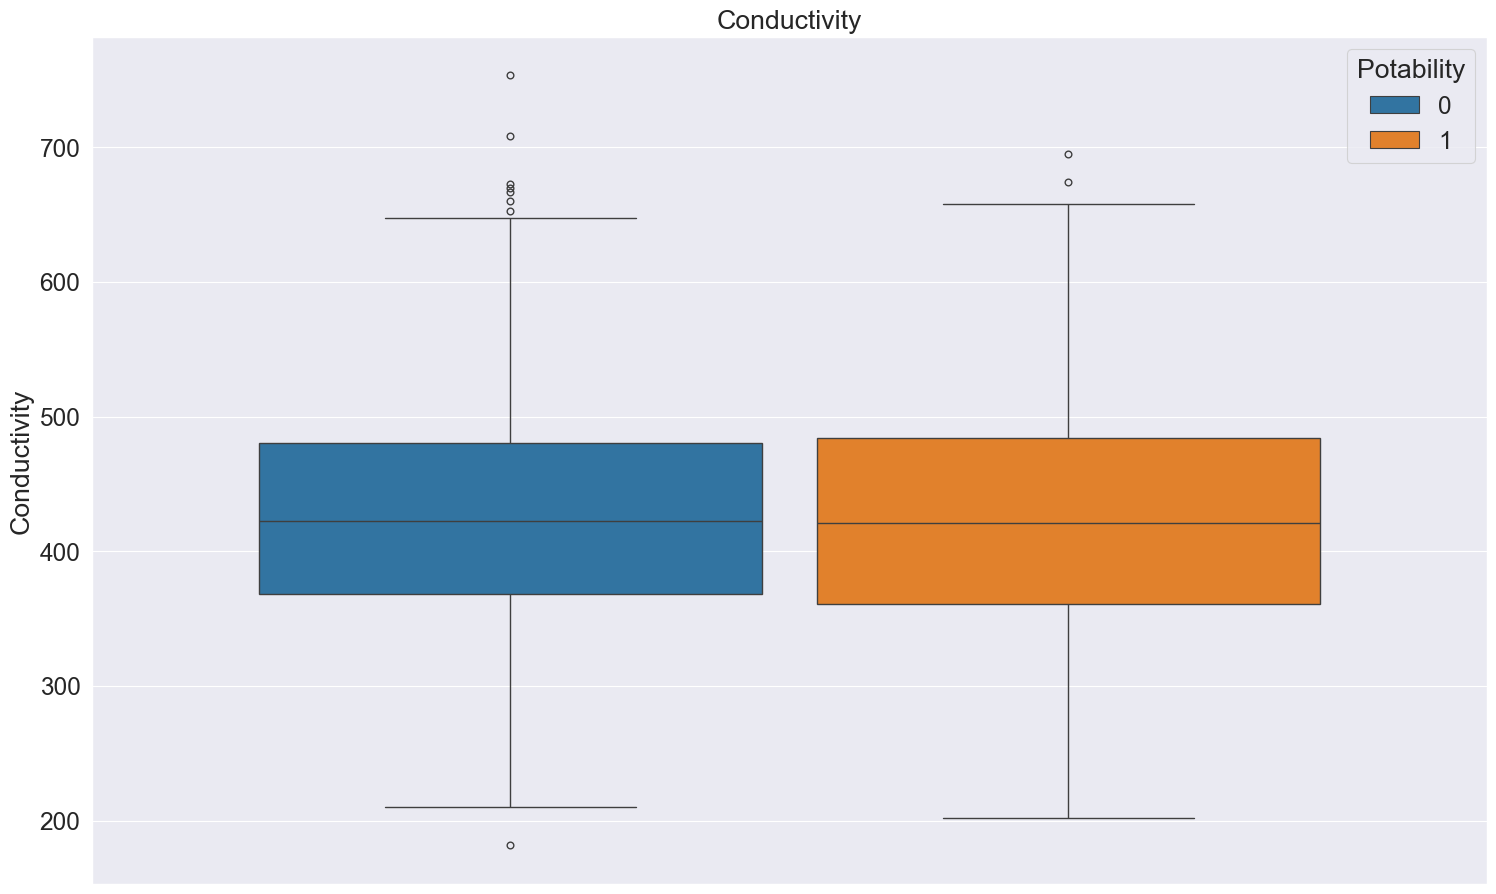

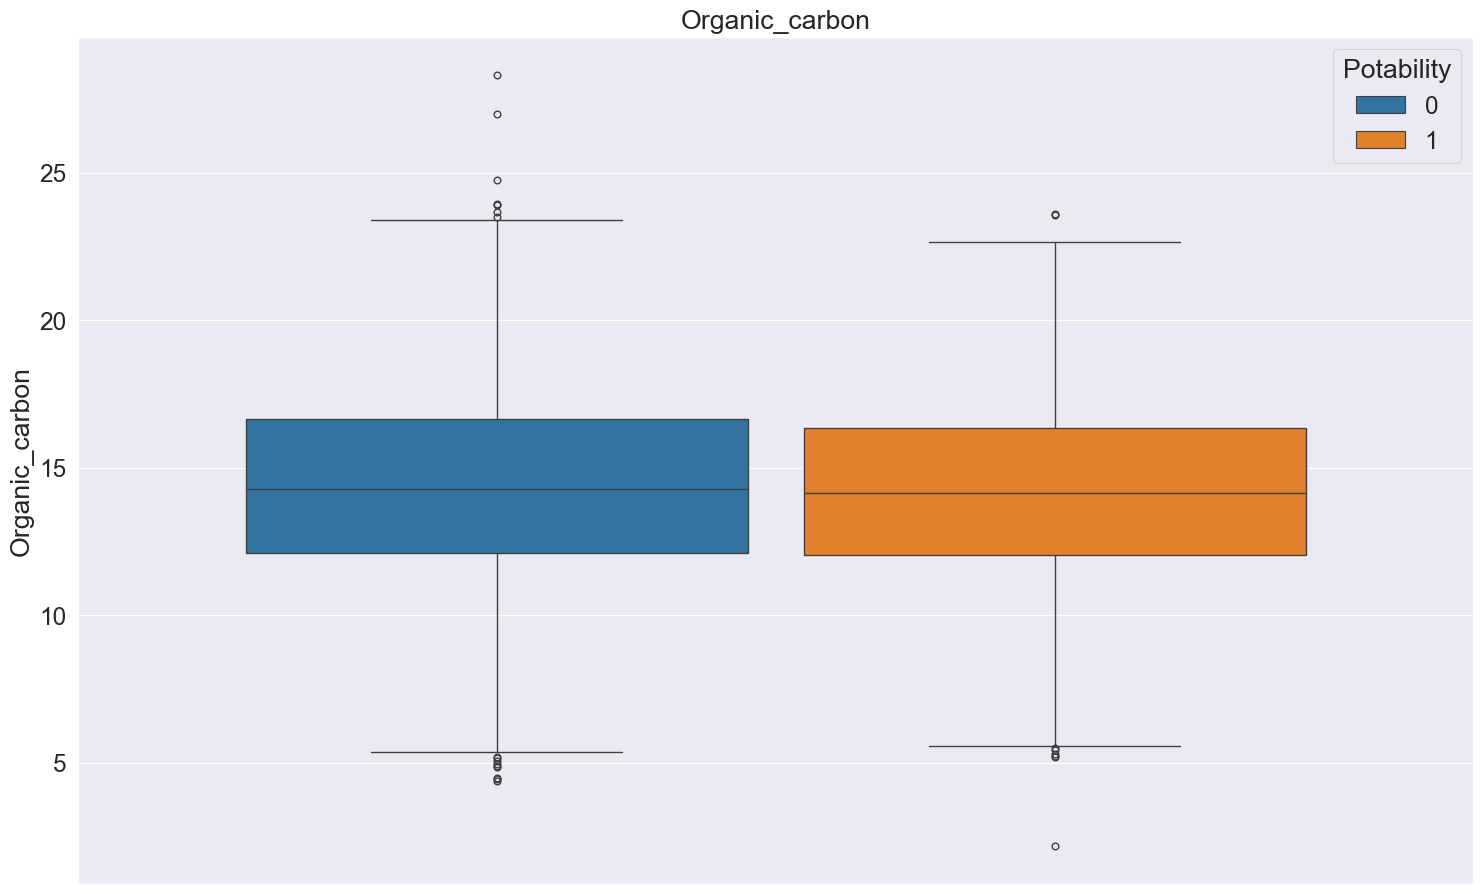

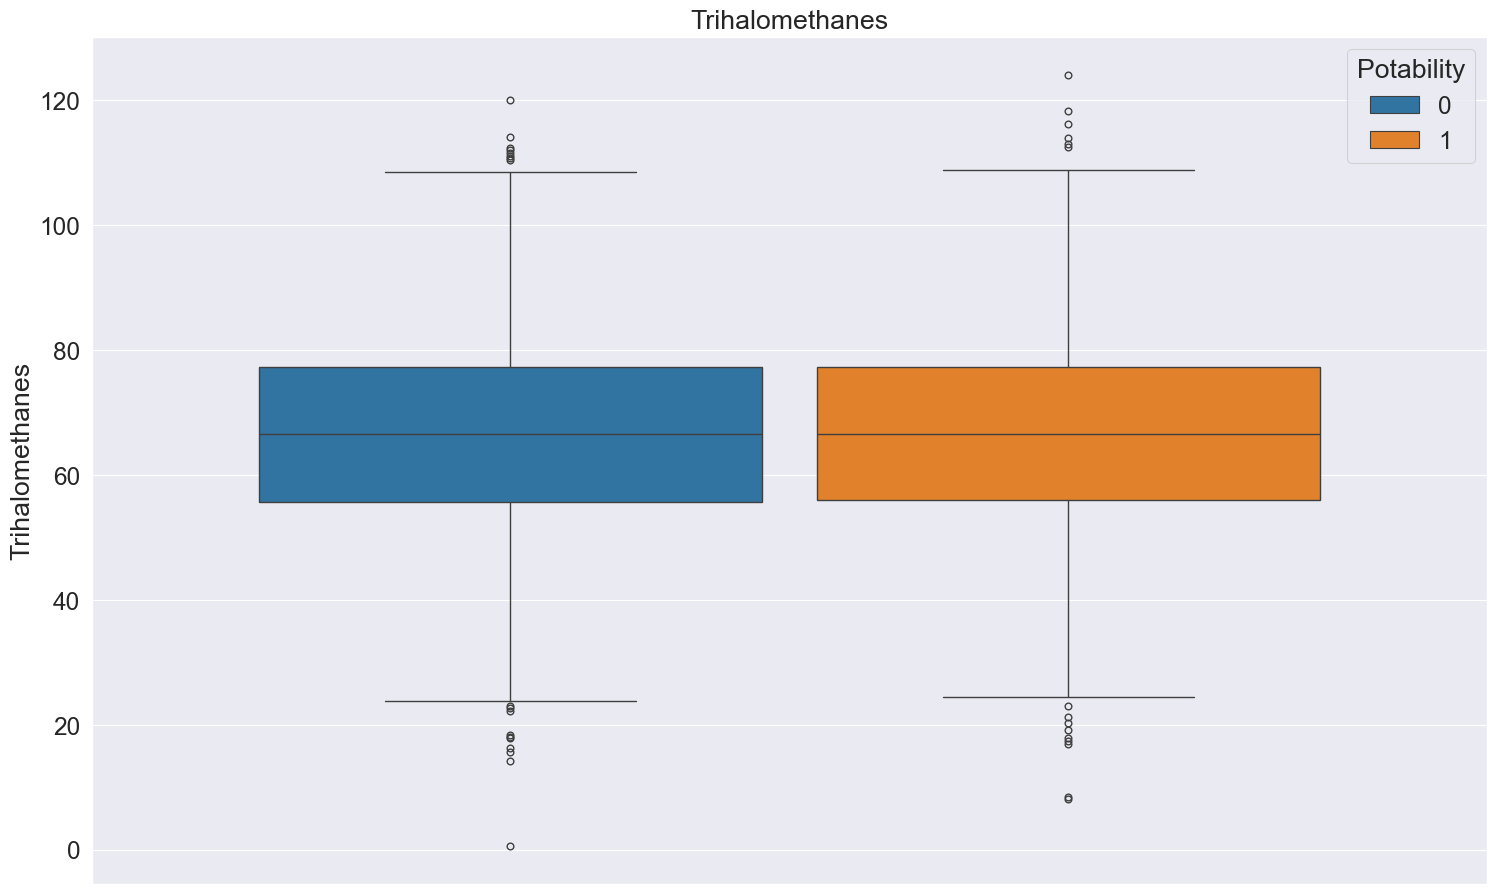

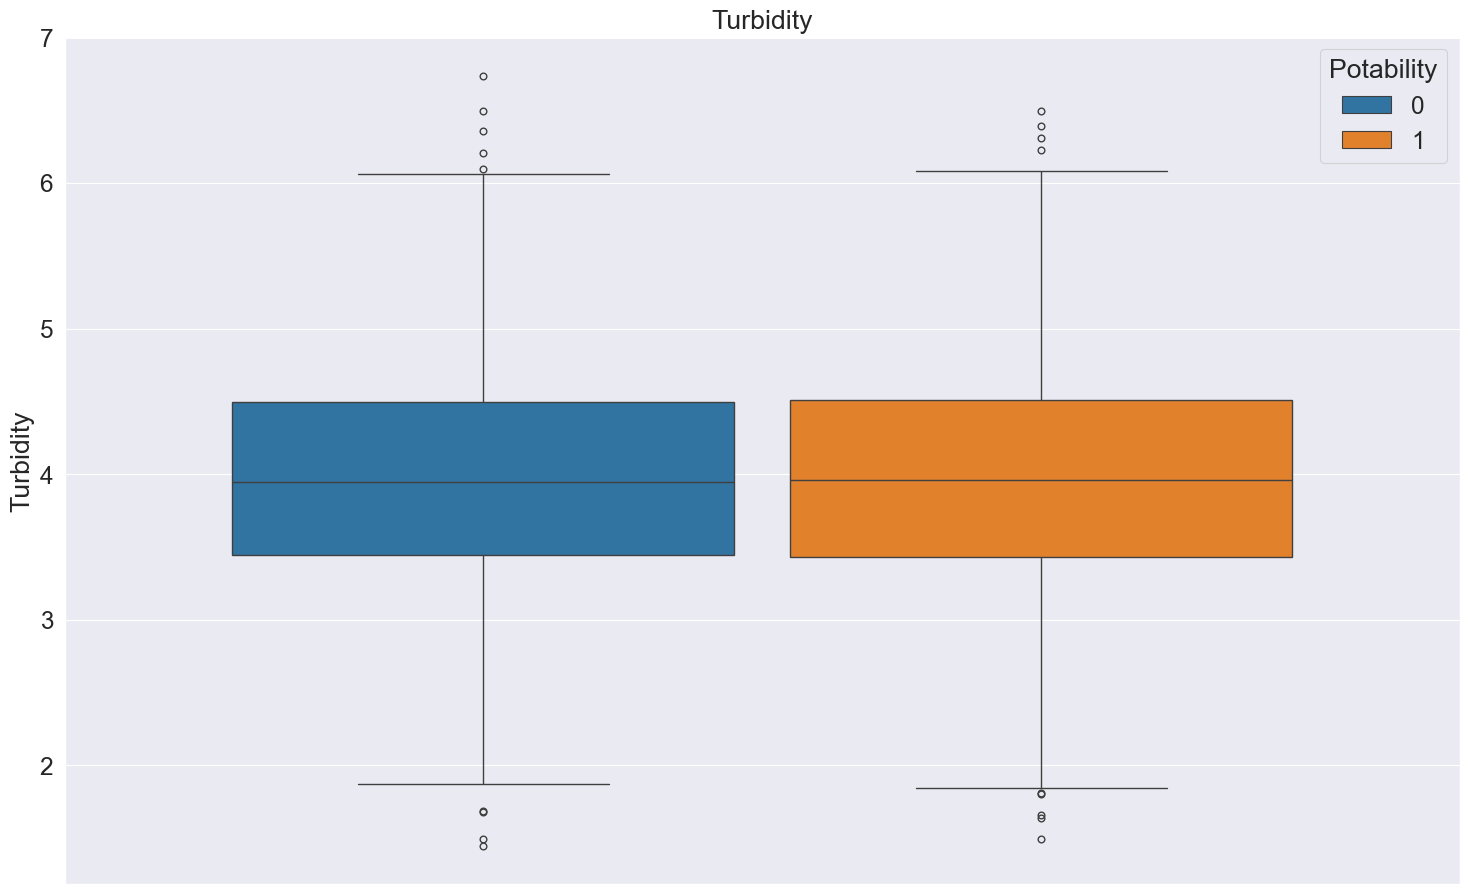

In [21]:
# box plots of each predictor with the response
for col in num_data.columns:
    df_temp = pd.concat([df['Potability'], num_data[col]], join='inner', axis=1).dropna()
    sns.boxplot(hue = 'Potability', y = col, data = df_temp, gap=0.1).set_title(col)
    plt.show()

## handeling missing values

In [45]:
X=df.drop(['Potability'], axis=1)
y=df['Potability']

# train set test set split before missing values imputation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
     

df1 = pd.concat([X_train, pd.DataFrame(y_train)], join='inner', axis=1)
df2 = pd.concat([X_test, pd.DataFrame(y_test)], join='inner', axis=1)

In [46]:
y_train.value_counts()

Potability
0    1598
1    1022
Name: count, dtype: int64

In [47]:
y_test.value_counts()

Potability
0    400
1    256
Name: count, dtype: int64

### 1) Mean and Median imputation

In [25]:
# Impute Missing Values with Label Matching Mean/ Median from respective class
'''for col in ['Sulfate','ph','Trihalomethanes']:
    df1[col] = df1[col].fillna(df1.groupby(['Potability'])[col].transform('median'))
    df2[col] = df2[col].fillna(df2.groupby(['Potability'])[col].transform('median'))'''

"for col in ['Sulfate','ph','Trihalomethanes']:\n    df1[col] = df1[col].fillna(df1.groupby(['Potability'])[col].transform('median'))\n    df2[col] = df2[col].fillna(df2.groupby(['Potability'])[col].transform('median'))"

### 2) KNN imputation

In [286]:
# impute missing values using knnimputer
'''from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
#imputer = IterativeImputer(random_state=42)
X_train_new = imputer.fit_transform(X_train)
X_test_new = imputer.fit_transform(X_test)'''

### 3) Random forest imputation (Used)

In [48]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), random_state=42)
df1_new = imputer.fit_transform(df1)
df1_new = pd.DataFrame(df1_new, columns = df1.columns)

df2_new = imputer.fit_transform(df2)
df2_new = pd.DataFrame(df2_new, columns = df2.columns)

In [49]:
# new train and test sets
X_train_new=df1_new.drop(['Potability'], axis=1)
y_train_new=df1_new['Potability']

X_test_new=df2_new.drop(['Potability'], axis=1)
y_test_new=df2_new['Potability']

## Handling data imbalance (not used in final solution)

### 1.Undersampling with ensemble

In [32]:
y_train_new.value_counts()

Potability
0    1598
1    1022
Name: count, dtype: int64

In [34]:
df_class0 = df1[df1.Potability==0]
df_class1 = df1[df1.Potability==1]

In [37]:
df_train_new1

0         1         2         3         4         5         6  \
0     0.469732  0.298687  0.123887 -0.637200  2.248245  0.667246  0.428015   
2     0.860642  0.805980  0.695684 -0.471583  0.000000 -0.542004  0.075632   
3    -0.206460  0.548375  0.086357  0.023796  0.000000 -0.444767  0.581955   
4    -0.356376  0.136679 -0.324580 -0.460462 -0.238962  0.487103  0.517019   
5     0.418233 -0.367010 -0.099010  0.872608  1.461065  0.549459 -1.191568   
...        ...       ...       ...       ...       ...       ...       ...   
2452 -0.182881 -0.019018  0.386520  0.041311 -0.673616  0.087025 -0.467086   
2453 -0.295158  0.409444  0.231737 -0.256299 -0.278914  0.046211  0.030776   
2454  2.653826 -3.047627  1.576948  0.703537  0.091976 -0.120726  0.024980   
2457  0.000000  0.150077 -0.770064  0.919701  1.008936 -0.388930 -0.138796   
2459  0.713264 -0.760855 -0.595458  1.660897 -2.778548 -0.290325 -0.104215   

             7         8  Potability  
0    -0.284677 -0.127215           0  
2    -0.273767  0.408452           0  
3     0.399823 -0.063716           0  
4    -0.993981 -0.398715           0  
5    -0.410484 -0.405782           0  
...        ...       ...         ...  
2452  0.512902  1.420227           1  
2453 -1.634019  0.463652           1  
2454 -0.648258 -0.625342           1  
2457 -0.363236 -0.772937           1  
2459 -0.251471  0.953571           1  

[1799 rows x 10 columns]

In [36]:
# train set 1
df_train_new1 = pd.concat([df_class0[:1022], df_class1], axis=0)
print(df_train_new1.Potability.value_counts())

# train set 2
df_train_new2 = pd.concat([df_class0[1022:1599], df_class1[:511]], axis=0)
print(df_train_new2.Potability.value_counts())

# train set 3
df_train_new3 = pd.concat([df_class0[1022:1599], df_class1[511:]], axis=0)
print(df_train_new3.Potability.value_counts())

Potability
0    1022
1     777
Name: count, dtype: int64
Potability
1    511
0    318
Name: count, dtype: int64
Potability
0    318
1    266
Name: count, dtype: int64


In [38]:
def model_preds(model, tr1 = df_train_new1, tr2 = df_train_new2, tr3 = df_train_new3):
    
    model.fit(tr1.drop(['Potability'], axis=1), tr1['Potability'])
    pred1 = model.predict(X_test_new)
    model.fit(tr2.drop(['Potability'], axis=1), tr2['Potability'])
    pred2 = model.predict(X_test_new)
    model.fit(tr3.drop(['Potability'], axis=1), tr3['Potability'])
    pred3 = model.predict(X_test_new)

    y_pred_final = pred1.copy()
    for i in range(len(X_test_new)):
        n = pred1[i]+pred2[i]+pred3[i]
        if n>1:
            y_pred_final[i] = 1
        else:
            y_pred_final[i] = 0

    return y_pred_final

### 2. Oversampling

In [28]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

ros = SMOTE(random_state=42)
#ros = RandomOverSampler(random_state=42)
X_train_new, y_train_new = ros.fit_resample(X_train_new, y_train_new)

In [29]:
y_train_new.value_counts()

Potability
0.0    1598
1.0    1598
Name: count, dtype: int64

## Scaling the data

In [50]:
from sklearn.preprocessing import RobustScaler,StandardScaler, MinMaxScaler
scale = MinMaxScaler()
X_train_new=scale.fit_transform(X_train_new)
X_test_new=scale.fit_transform(X_test_new)

## PCA

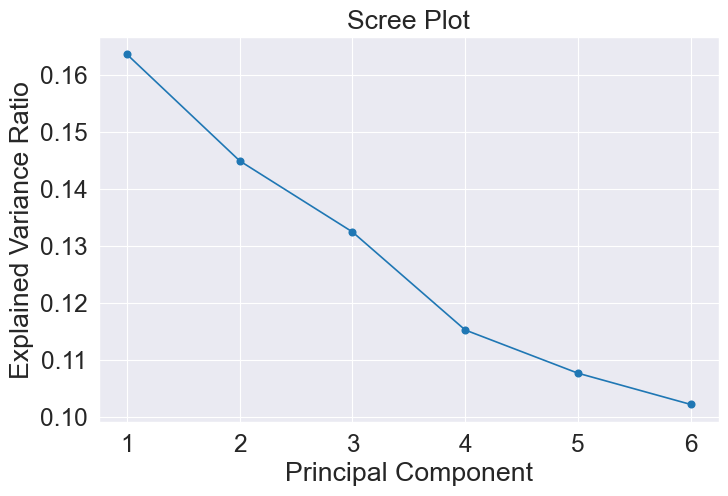

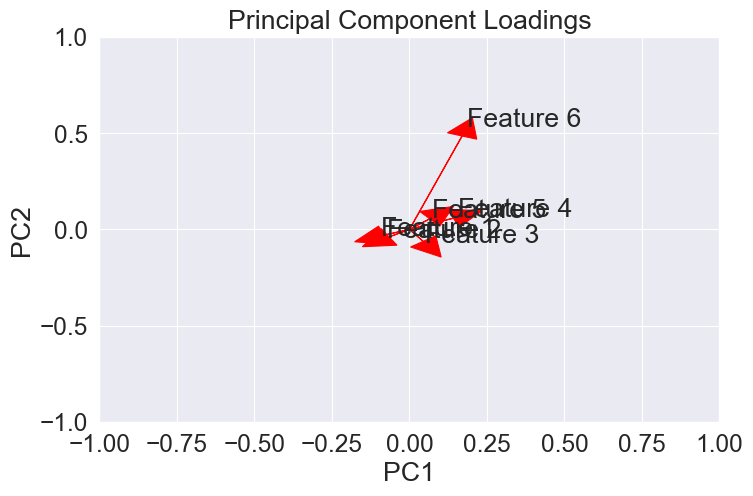


Explained variance ratio: 0.7660497740235217


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize PCA with desired number of components
pca = PCA(n_components=6)

# Fit PCA to the data
pca.fit(X_train_new)

# Transform the data to its principal components
X_transformed = pca.transform(X_train_new)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()

# Loadings
loadings = pca.components_

# Plot loadings
plt.figure(figsize=(8, 5))
for i in range(pca.n_components_):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.1, head_length=0.1, fc='r', ec='r')
    plt.text(loadings[i, 0] * 1.1, loadings[i, 1] * 1.1, f'Feature {i+1}')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Loadings')
plt.grid(True)
plt.show()

print("\nExplained variance ratio:", sum(pca.explained_variance_ratio_))

## Model fitting

In [51]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=-1, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_new, X_test_new, y_train_new, y_test_new)

print(models)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:06<00:00,  4.14it/s]

[LightGBM] [Info] Number of positive: 1022, number of negative: 1598
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.390076 -> initscore=-0.446991
[LightGBM] [Info] Start training from score -0.446991


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:07<00:00,  4.11it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.68               0.65     0.65      0.67   
QuadraticDiscriminantAnalysis      0.68               0.64     0.64      0.67   
SVC                                0.67               0.62     0.62      0.65   
BaggingClassifier                  0.66               0.62     0.62      0.64   
XGBClassifier                      0.64               0.61     0.61      0.64   
RandomForestClassifier             0.65               0.61     0.61      0.64   
ExtraTreesClassifier               0.65               0.60     0.60      0.63   
KNeighborsClassifier               0.63               0.59     0.59      0.62   
NuSVC                              0.61               0.59     0.59      0.61   
LabelPropagation                   0.59               0.57     0.57      0.59   
LabelSpreading              

# ML models

In [52]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [53]:
rfc = RandomForestClassifier()
bc = BaggingClassifier()
lgbm = LGBMClassifier(verbose=-1)
xgb = XGBClassifier()
etc = ExtraTreesClassifier()
dtc = DecisionTreeClassifier()
bnb = BernoulliNB()
ada = AdaBoostClassifier()
qda = QuadraticDiscriminantAnalysis()
svc = SVC()

lr = LogisticRegression()

clf = {'RandomForest':rfc, 'Bagging':bc, 'LightGB':lgbm, 'XGBoost':xgb, 'ExtraTrees':etc, 'DesicionTree':dtc, 'BernoulliNB':bnb, 'AdaBoost':ada, 'QuadraticDiscriminantAnalysis':qda, 'SVC':svc, 'LogisticRegression':lr}
for name,algo in clf.items():
    score = cross_val_score(algo, X_train_new, y_train_new, cv = 5, scoring = 'accuracy')
    print("The cv score of {} is:".format(name), score.mean())

The cv score of RandomForest is: 0.6938931297709925
The cv score of Bagging is: 0.669083969465649
The cv score of LightGB is: 0.6908396946564885
The cv score of XGBoost is: 0.6793893129770991
The cv score of ExtraTrees is: 0.6988549618320612
The cv score of DesicionTree is: 0.6022900763358778
The cv score of BernoulliNB is: 0.6099236641221374
The cv score of AdaBoost is: 0.5958015267175572
The cv score of QuadraticDiscriminantAnalysis is: 0.6877862595419847
The cv score of SVC is: 0.6786259541984733
The cv score of LogisticRegression is: 0.6099236641221374


# Stacking (ML models)

In [54]:
from itertools import combinations
from sklearn.metrics import accuracy_score 

clf_new = {'RandomForest':rfc, 'LightGB':lgbm, 'XGBoost':xgb, 'ExtraTrees':etc, 'QuadraticDiscriminantAnalysis':qda, 'SVC': svc, 'Bagging':bc}
meta_new = {'LogisticRegression':lr}
meta_models = list(meta_new.values())
base_models = list(clf_new.items())
meta_models.append(lr)

base_combinations = [list(combinations(base_models, i)) for i in range(2, len(base_models) + 1)]
base_combinations = [list(item) for sublist in base_combinations for item in sublist]

In [55]:
best_accuracy = 0
best_stacking_model = None

for base_combination in base_combinations:
    for meta_model in meta_models:
        stack_model = StackingClassifier(estimators=base_combination, final_estimator=meta_model, passthrough=True, n_jobs=-1)
        stack_model.fit(X_train_new, y_train_new)
        stacking_predictions = stack_model.predict(X_test_new)
        #stacking_predictions = model_preds(stack_model)
        #score = cross_val_score(stack_model, X_train_new, y_train_new, cv = 5, scoring = 'accuracy')
        accuracy = accuracy_score(y_test_new, stacking_predictions)
        #accuracy = score.mean()
    
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_stacking_model = stack_model

#print("Best Stacking CV Accuracy:", best_accuracy)
print("Test Accuracy of the Best Stacking Model:", best_accuracy)
print("Best Stacking Model:", best_stacking_model)

Test Accuracy of the Best Stacking Model: 0.7027439024390244
Best Stacking Model: StackingClassifier(estimators=[('LightGB', LGBMClassifier(verbose=-1)),
                               ('QuadraticDiscriminantAnalysis',
                                QuadraticDiscriminantAnalysis()),
                               ('Bagging', BaggingClassifier())],
                   final_estimator=LogisticRegression(), n_jobs=-1,
                   passthrough=True)


In [57]:
score = cross_val_score(best_stacking_model, X_train_new, y_train_new, cv = 10, scoring = 'accuracy')
print("Best Stacking CV Accuracy:", score.mean())

Best Stacking CV Accuracy: 0.6961832061068701


              precision    recall  f1-score   support

         0.0       0.72      0.83      0.77       400
         1.0       0.65      0.48      0.55       256

    accuracy                           0.70       656
   macro avg       0.68      0.66      0.66       656
weighted avg       0.69      0.70      0.69       656



<Axes: >

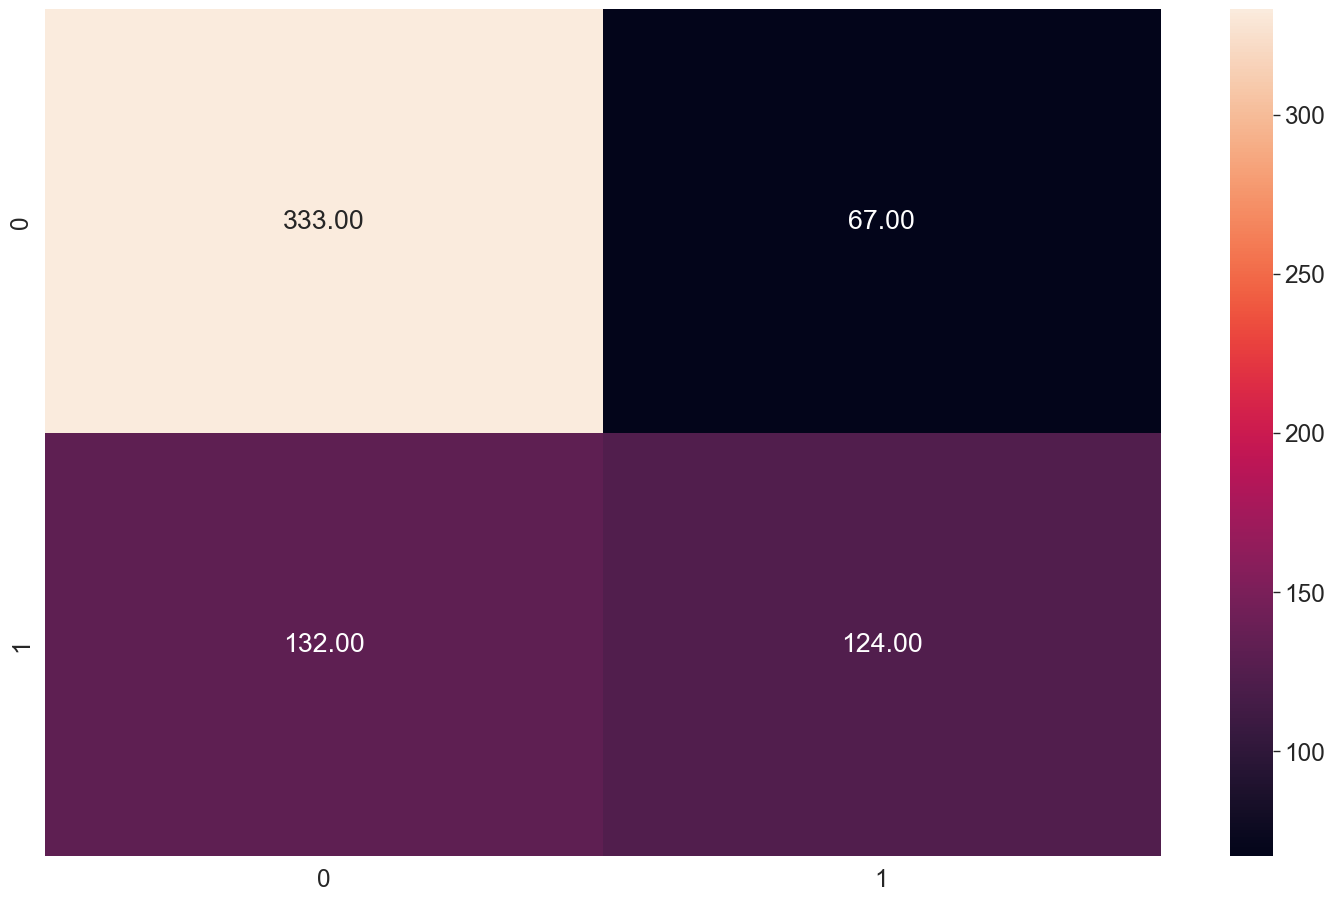

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

best_stacking_model.fit(X_train_new,y_train_new)
pred = best_stacking_model.predict(X_test_new)
print(classification_report(y_test_new, pred))
sns.heatmap(confusion_matrix(y_test_new, pred), annot=True, fmt='.2f')

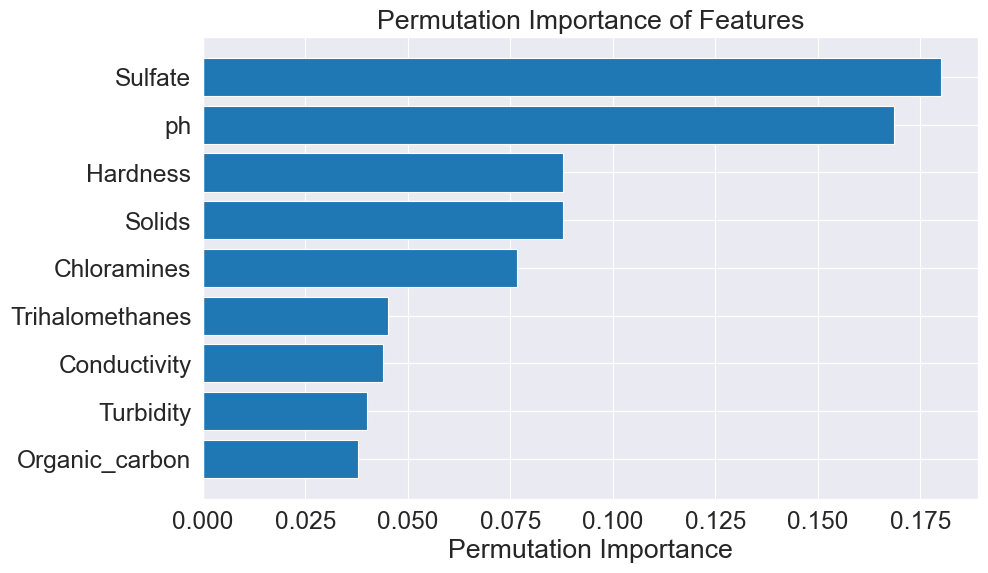

In [64]:
from sklearn.inspection import permutation_importance

perm_importance= permutation_importance(best_stacking_model, X_train_new, y_train_new, n_repeats=10, random_state=42)

sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(10, 6))
plt.barh(range(X_test.shape[1]), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(X_test.shape[1]), [list(df1_new.columns)[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance of Features')
plt.show()

# Parameter Tuning (ML)

## 1) RandomForest

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
    'random_state': randint(1,130)
}

# Create the model
model = RandomForestClassifier()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy',refit=True)

# Fit the model
random_search.fit(X_train_new, y_train_new)

# Print the best parameters found
print("Best parameters found:")
print(random_search.best_params_)

# Print the best score found
print("Best accuracy score found:", random_search.best_score_) 

Best parameters found:
{'bootstrap': False, 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 175, 'random_state': 49}
Best accuracy score found: 0.6927480916030534


              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       400
         1.0       0.60      0.44      0.51       256

    accuracy                           0.67       656
   macro avg       0.65      0.63      0.63       656
weighted avg       0.66      0.67      0.66       656



<Axes: >

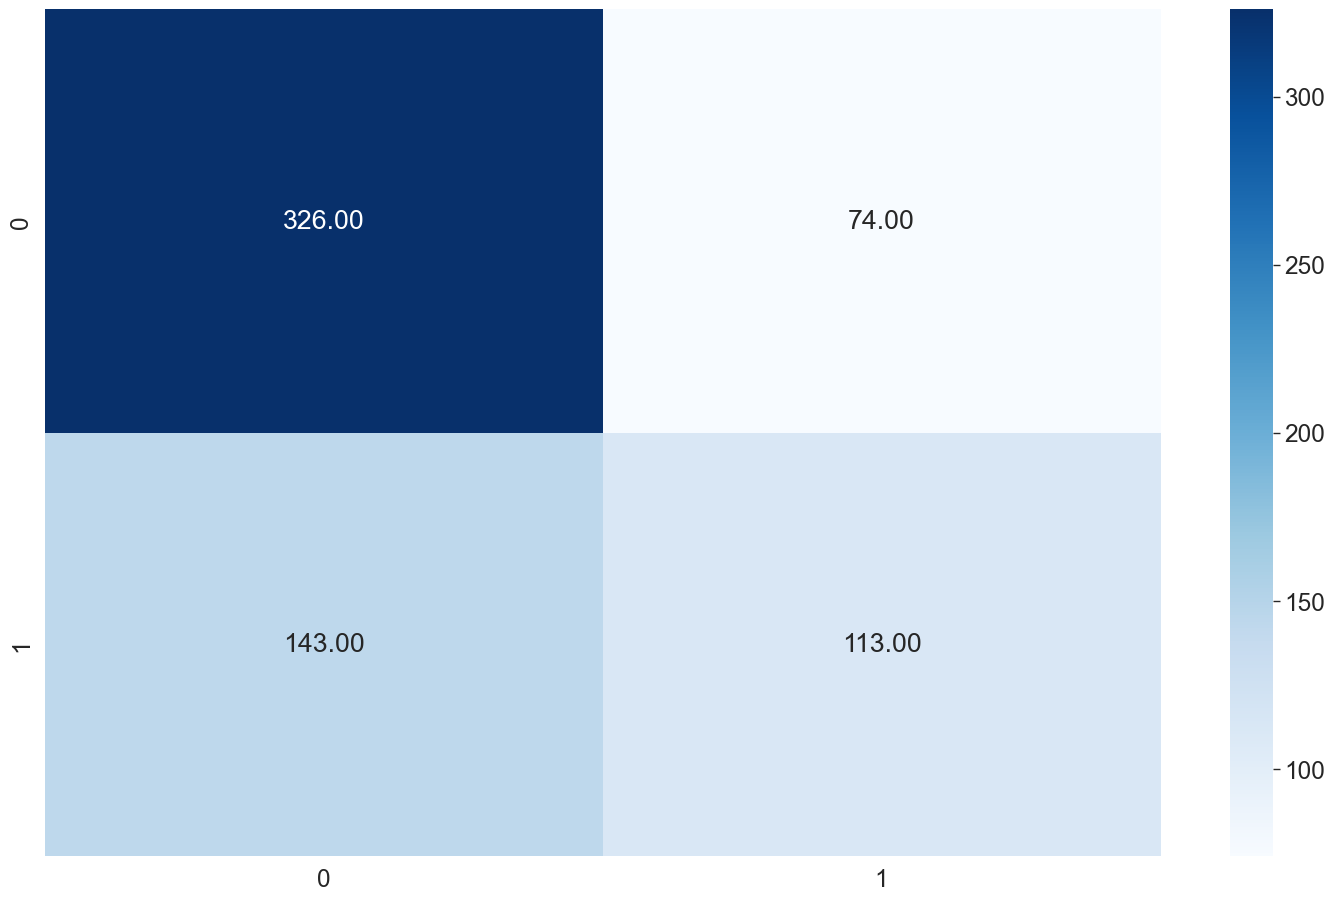

In [132]:
from sklearn.metrics import classification_report, confusion_matrix

best_rf = random_search.best_estimator_

model = best_rf
model.fit(X_train_new,y_train_new)
pred = model.predict(X_test_new)
print(classification_report(y_test_new, pred))
sns.heatmap(confusion_matrix(y_test_new, pred), annot=True, fmt='.2f', cmap="Blues")

## 2) SVC

In [74]:
from scipy.stats import uniform, randint

# Define the parameter grid
param_dist = {
    'C': uniform(0.1, 10),  # Penalty parameter C of the error term
    'gamma': uniform(0.001, 1),  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
    'degree': randint(2, 5),  # Degree of the polynomial kernel function (if 'poly')
    'coef0': uniform(0.0, 1.0),  # Independent term in kernel function (if 'poly' or 'sigmoid')
    'random_state': randint(0, 125)
}

# Initialize the SVM classifier
svm = SVC()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_train_new, y_train_new)

# Get the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'C': 8.25461428454834, 'coef0': 0.7068573438476171, 'degree': 4, 'gamma': 0.7911755405312056, 'kernel': 'poly', 'random_state': 4}
Best Score: 0.6858778625954198


              precision    recall  f1-score   support

         0.0       0.68      0.83      0.75       400
         1.0       0.60      0.39      0.48       256

    accuracy                           0.66       656
   macro avg       0.64      0.61      0.61       656
weighted avg       0.65      0.66      0.64       656



<Axes: >

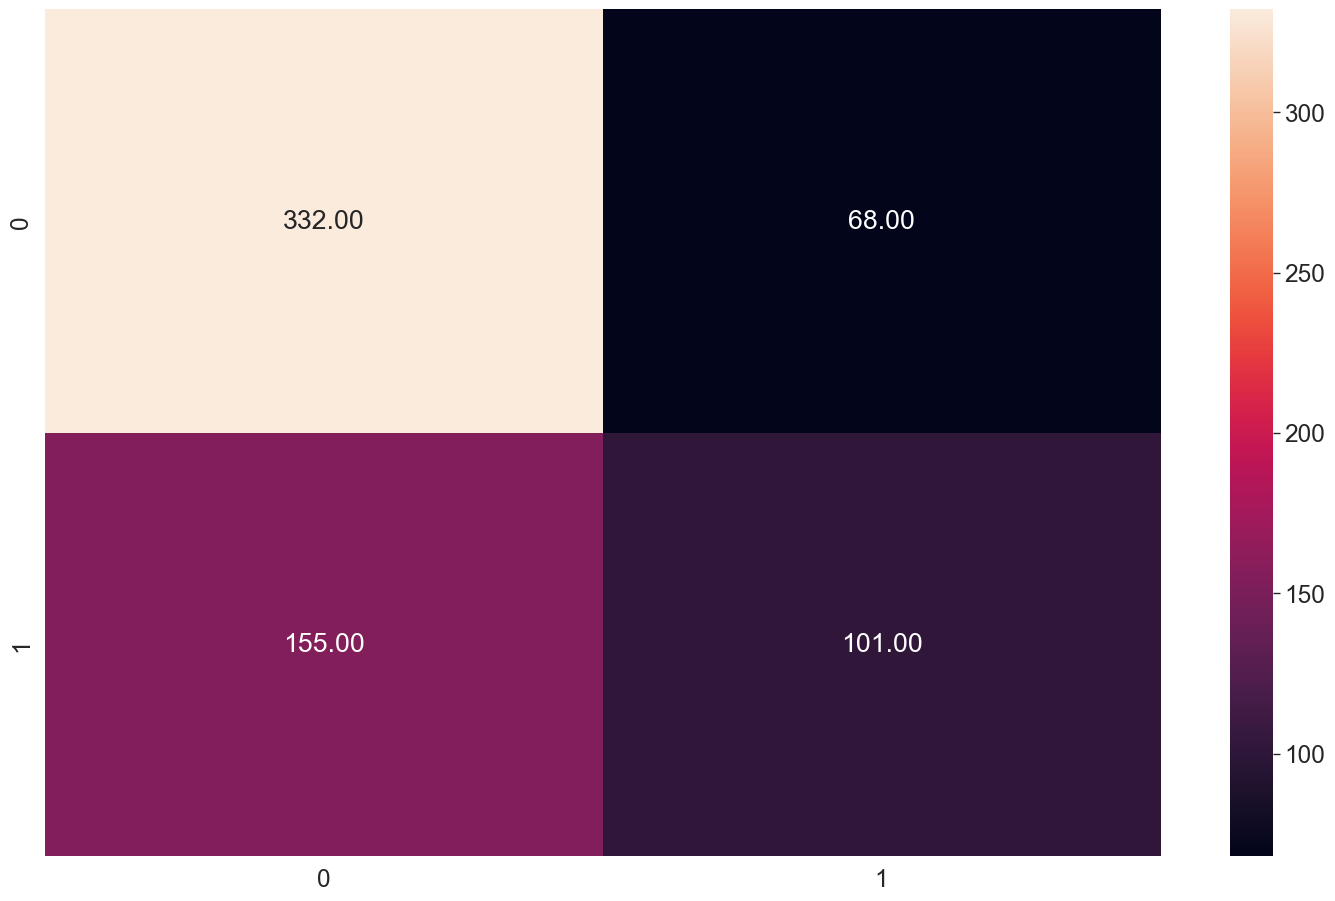

In [75]:
# Get the best model
best_svm = random_search.best_estimator_

model = best_svm
model.fit(X_train_new,y_train_new)
pred = model.predict(X_test_new)
print(classification_report(y_test_new, pred))
sns.heatmap(confusion_matrix(y_test_new, pred), annot=True, fmt='.2f')

## 3) LGBM

In [76]:
# Define the parameter grid
param_dist = {
    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate
    'n_estimators': randint(50, 200),  # Number of boosting rounds
    'max_depth': randint(3, 10),  # Maximum depth of the tree
    'num_leaves': randint(10, 100),  # Maximum number of leaves in one tree
    'min_child_samples': randint(2, 50),  # Minimal number of data in one leaf
    'reg_alpha': [0, 0.1, 0.5, 1],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5, 1],  # L2 regularization term on weights
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'random_state': randint(1, 125)
}

# Initialize the LightGBM classifier
lgbm = LGBMClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(lgbm, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_train_new, y_train_new)

# Get the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Number of positive: 1022, number of negative: 1598
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.390076 -> initscore=-0.446991
[LightGBM] [Info] Start training from score -0.446991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Info] Number of positive: 1022, number of negative: 1598
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.390076 -> initscore=-0.446991
[LightGBM] [Info] Start training from score -0.446991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

<Axes: >

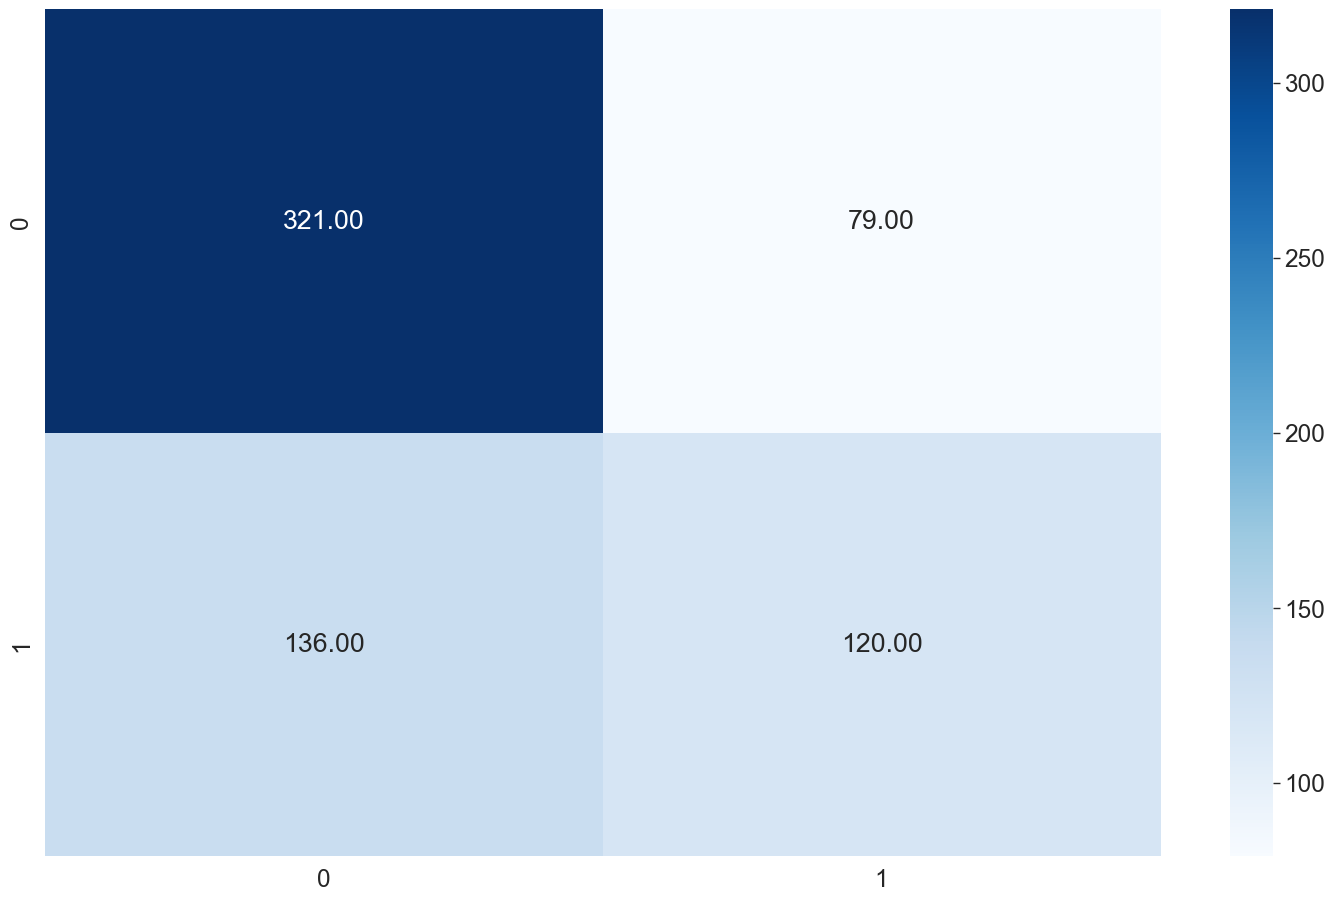

In [131]:
best_lgbm = random_search.best_estimator_

model = best_lgbm
model.fit(X_train_new,y_train_new)
pred = model.predict(X_test_new)
print(classification_report(y_test_new, pred))
sns.heatmap(confusion_matrix(y_test_new, pred), annot=True, fmt='.2f', cmap='Blues')

## 4) Bagging

In [79]:
# Define the base estimator
base_estimator = DecisionTreeClassifier()

# Define the parameter grid
param_dist = {
    'n_estimators': randint(10, 100),  # Number of base estimators
    'max_samples': [0.5, 0.7, 0.9, 1.0],  # Number of samples to draw from X to train each base estimator
    'max_features': [0.5, 0.7, 0.9, 1.0],  # Number of features to draw from X to train each base estimator
    'bootstrap': [True, False],  # Whether samples are drawn with replacement
    'bootstrap_features': [True, False],  # Whether features are drawn with replacement
    'random_state': randint(1, 125)
}

# Initialize the BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=base_estimator)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(bagging_clf, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_train_new, y_train_new)

# Get the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 97, 'random_state': 105}
Best Score: 0.698473282442748


              precision    recall  f1-score   support

         0.0       0.70      0.77      0.73       400
         1.0       0.58      0.50      0.53       256

    accuracy                           0.66       656
   macro avg       0.64      0.63      0.63       656
weighted avg       0.65      0.66      0.66       656



<Axes: >

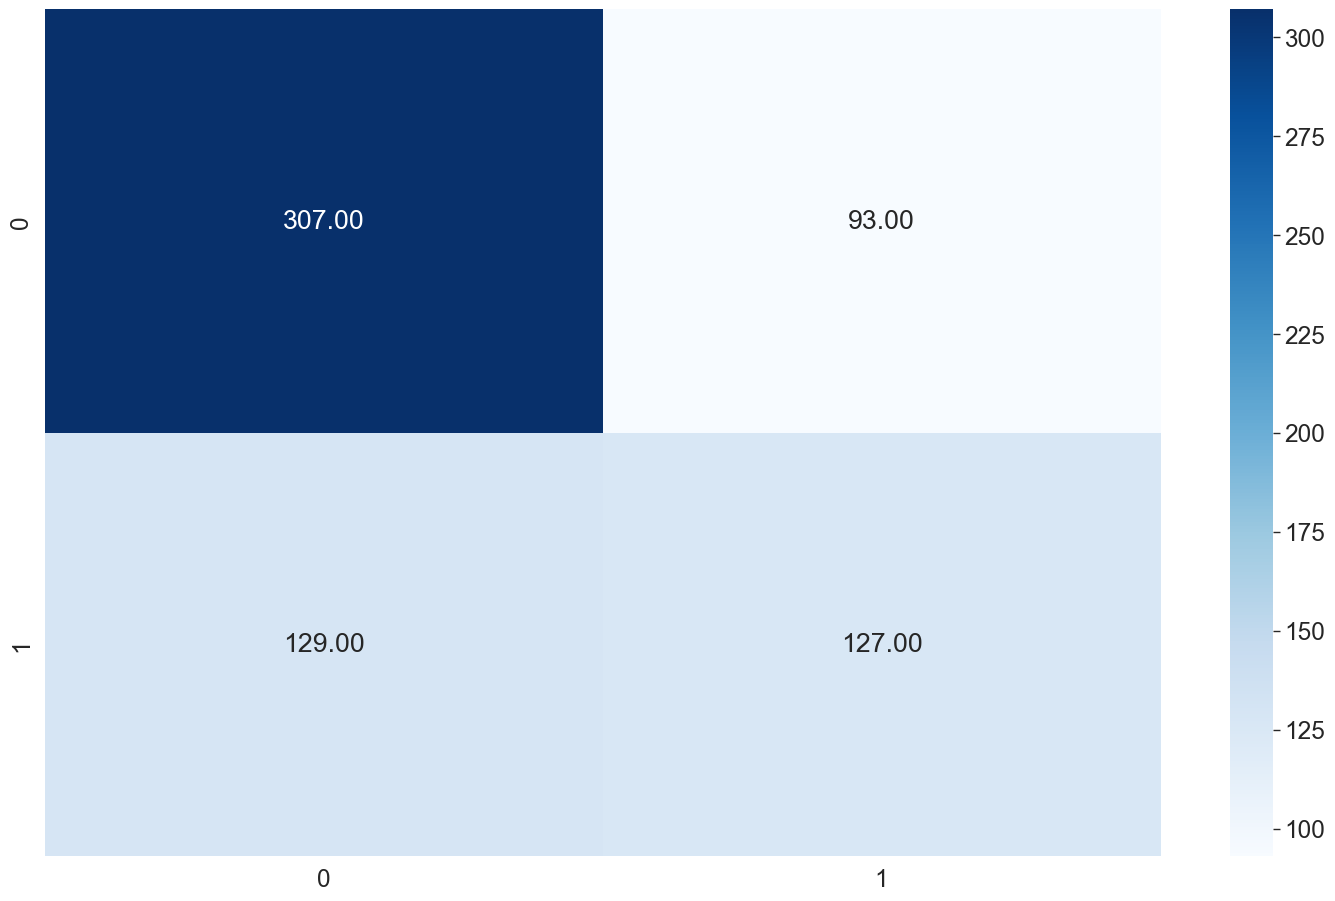

In [130]:
best_bagging = random_search.best_estimator_

model = best_bagging
model.fit(X_train_new,y_train_new)
pred = model.predict(X_test_new)
print(classification_report(y_test_new, pred))
sns.heatmap(confusion_matrix(y_test_new, pred), annot=True, fmt='.2f', cmap='Blues')

## 5) ExtraTrees

In [81]:
# Define the parameter grid
param_dist = {
    'n_estimators': randint(100, 1000),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': randint(10, 100),  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy', 'log_loss'],  # The function to measure the quality of a split
    'random_state': randint(0, 125)
}

# Initialize the ExtraTreesClassifier
et_classifier = ExtraTreesClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(et_classifier, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_train_new, y_train_new)

# Get the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'bootstrap': False, 'criterion': 'log_loss', 'max_depth': 29, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 724, 'random_state': 71}
Best Score: 0.7022900763358779


              precision    recall  f1-score   support

         0.0       0.68      0.86      0.76       400
         1.0       0.63      0.38      0.48       256

    accuracy                           0.67       656
   macro avg       0.66      0.62      0.62       656
weighted avg       0.66      0.67      0.65       656



<Axes: >

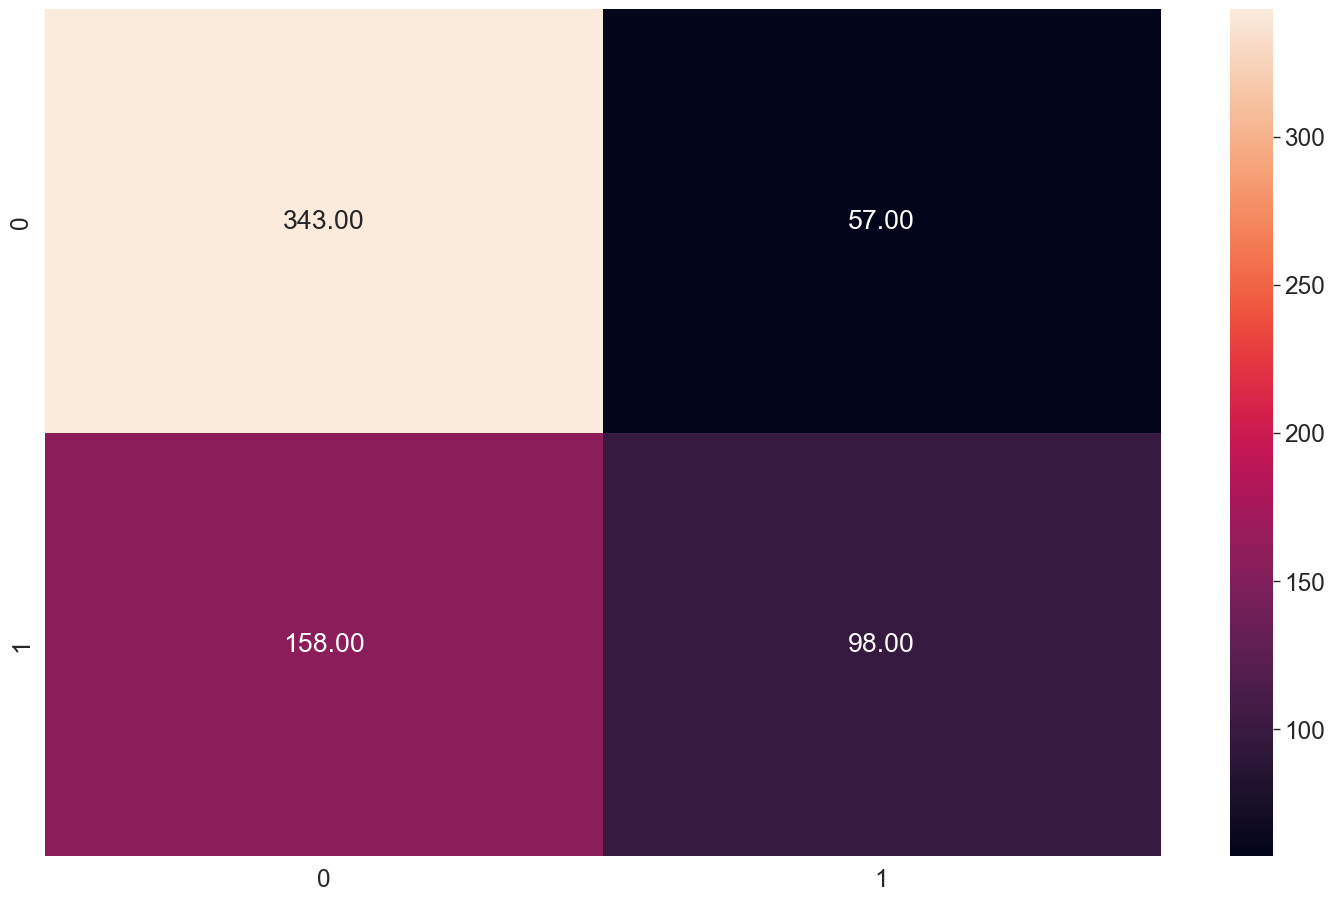

In [82]:
best_et = random_search.best_estimator_

model = best_et
model.fit(X_train_new,y_train_new)
pred = model.predict(X_test_new)
print(classification_report(y_test_new, pred))
sns.heatmap(confusion_matrix(y_test_new, pred), annot=True, fmt='.2f')

## 6) XGBoost

In [84]:
# Define the parameter grid
param_dist = {
    'n_estimators': randint(100, 1000),  # Number of boosting rounds
    'learning_rate': uniform(0.01, 0.3),  # Step size shrinkage used in update to prevents overfitting
    'max_depth': randint(3, 10),  # Maximum depth of a tree
    'subsample': uniform(0.5, 0.5),  # Subsample ratio of the training instance
    'colsample_bytree': uniform(0.5, 0.5),  # Subsample ratio of columns when constructing each tree
    'gamma': uniform(0, 0.5),  # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'reg_alpha': uniform(0, 1),  # L1 regularization term on weights
    'reg_lambda': uniform(0, 1),  # L2 regularization term on weights
    'random_state': randint(0, 125)
}

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_train_new, y_train_new)

# Get the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'colsample_bytree': 0.863060422035924, 'gamma': 0.37854060102122794, 'learning_rate': 0.12335516478273592, 'max_depth': 7, 'n_estimators': 177, 'random_state': 72, 'reg_alpha': 0.12915941515149498, 'reg_lambda': 0.9540510272587224, 'subsample': 0.80308731722544}
Best Score: 0.6980916030534352


              precision    recall  f1-score   support

         0.0       0.68      0.76      0.72       400
         1.0       0.54      0.45      0.49       256

    accuracy                           0.64       656
   macro avg       0.61      0.60      0.61       656
weighted avg       0.63      0.64      0.63       656



<Axes: >

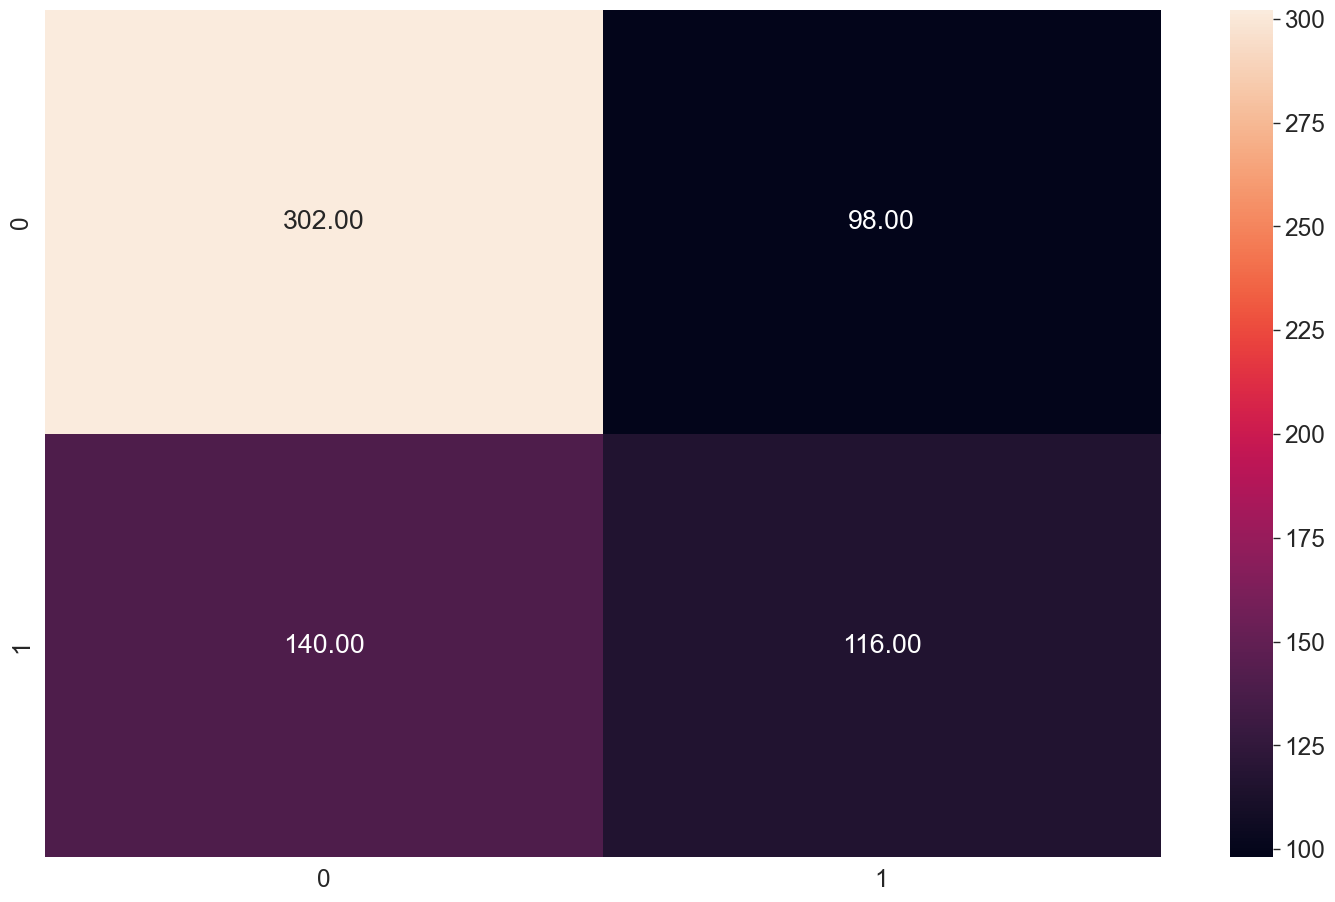

In [86]:
best_xgb = random_search.best_estimator_

model = best_xgb
model.fit(X_train_new,y_train_new)
pred = model.predict(X_test_new)
print(classification_report(y_test_new, pred))
sns.heatmap(confusion_matrix(y_test_new, pred), annot=True, fmt='.2f')

## 7) QDA

In [89]:
# Define the parameter grid
param_dist = {
    'reg_param': uniform(0, 1)  # Regularization parameter
}

# Initialize the QuadraticDiscriminantAnalysis
qda_classifier = QuadraticDiscriminantAnalysis()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(qda_classifier, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_train_new, y_train_new)

# Get the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'reg_param': 0.005522117123602399}
Best Score: 0.6641221374045801


              precision    recall  f1-score   support

         0.0       0.66      0.91      0.77       400
         1.0       0.67      0.28      0.40       256

    accuracy                           0.67       656
   macro avg       0.67      0.60      0.58       656
weighted avg       0.67      0.67      0.62       656



<Axes: >

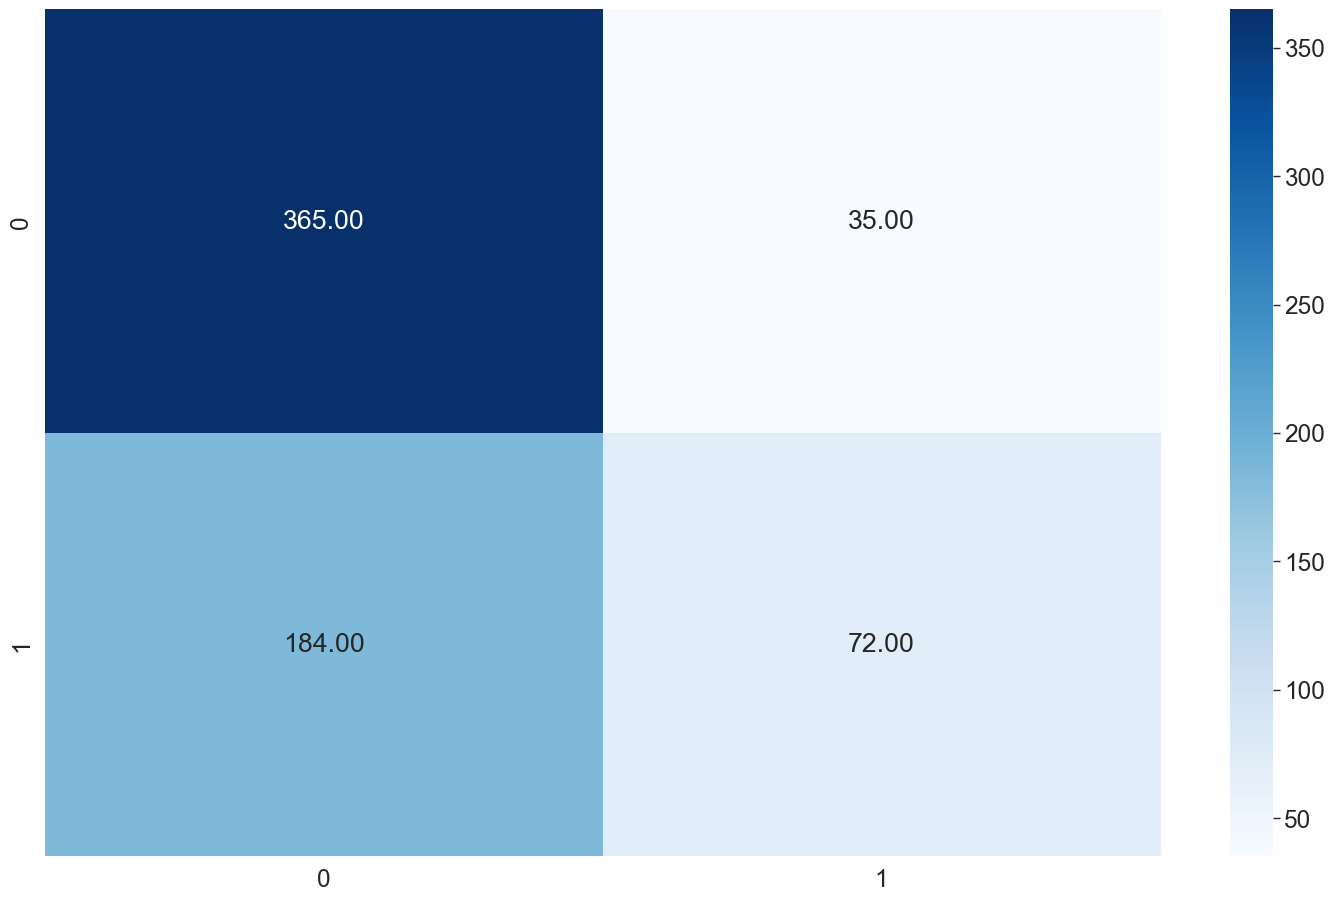

In [129]:
best_qda = random_search.best_estimator_

model = best_qda
model.fit(X_train_new,y_train_new)
pred = model.predict(X_test_new)
print(classification_report(y_test_new, pred))
sns.heatmap(confusion_matrix(y_test_new, pred), annot=True, fmt='.2f', cmap='Blues')

## Stacking with best estimators

In [96]:
clf_new = {'RandomForest':best_rf, 'LightGB':best_lgbm, 'XGBoost':best_xgb, 'ExtraTrees':best_et, 'QuadraticDiscriminantAnalysis':best_qda, 'SVC': best_svm, 'Bagging':best_bagging}
meta_new = {'LogisticRegression':lr}
meta_models = list(meta_new.values())
base_models = list(clf_new.items())
meta_models.append(lr)

base_combinations = [list(combinations(base_models, i)) for i in range(2, len(base_models) + 1)]
base_combinations = [list(item) for sublist in base_combinations for item in sublist]

In [97]:
best_accuracy = 0
best_stacking_model_updated = None

for base_combination in base_combinations:
    for meta_model in meta_models:
        stack_model = StackingClassifier(estimators=base_combination, final_estimator=meta_model, passthrough=True, n_jobs=-1)
        stack_model.fit(X_train_new, y_train_new)
        stacking_predictions = stack_model.predict(X_test_new)
        #stacking_predictions = model_preds(stack_model)
        #score = cross_val_score(stack_model, X_train_new, y_train_new, cv = 5, scoring = 'accuracy')
        accuracy = accuracy_score(y_test_new, stacking_predictions)
        #accuracy = score.mean()
    
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_stacking_model_updated = stack_model

#print("Best Stacking CV Accuracy:", best_accuracy)
print("Test Accuracy of the Best Stacking Model:", best_accuracy)
print("Best Stacking Model:", best_stacking_model_updated)

Test Accuracy of the Best Stacking Model: 0.6951219512195121
Best Stacking Model: StackingClassifier(estimators=[('LightGB',
                                LGBMClassifier(colsample_bytree=0.9,
                                               learning_rate=0.05, max_depth=9,
                                               min_child_samples=14,
                                               n_estimators=72, num_leaves=98,
                                               random_state=99, reg_alpha=0,
                                               reg_lambda=0.1, subsample=0.6)),
                               ('QuadraticDiscriminantAnalysis',
                                QuadraticDiscriminantAnalysis(reg_param=0.005522117123602399))],
                   final_estimator=LogisticRegression(), n_jobs=-1,
                   passthrough=True)


              precision    recall  f1-score   support

         0.0       0.71      0.83      0.77       400
         1.0       0.65      0.48      0.55       256

    accuracy                           0.70       656
   macro avg       0.68      0.66      0.66       656
weighted avg       0.69      0.70      0.68       656



<Axes: >

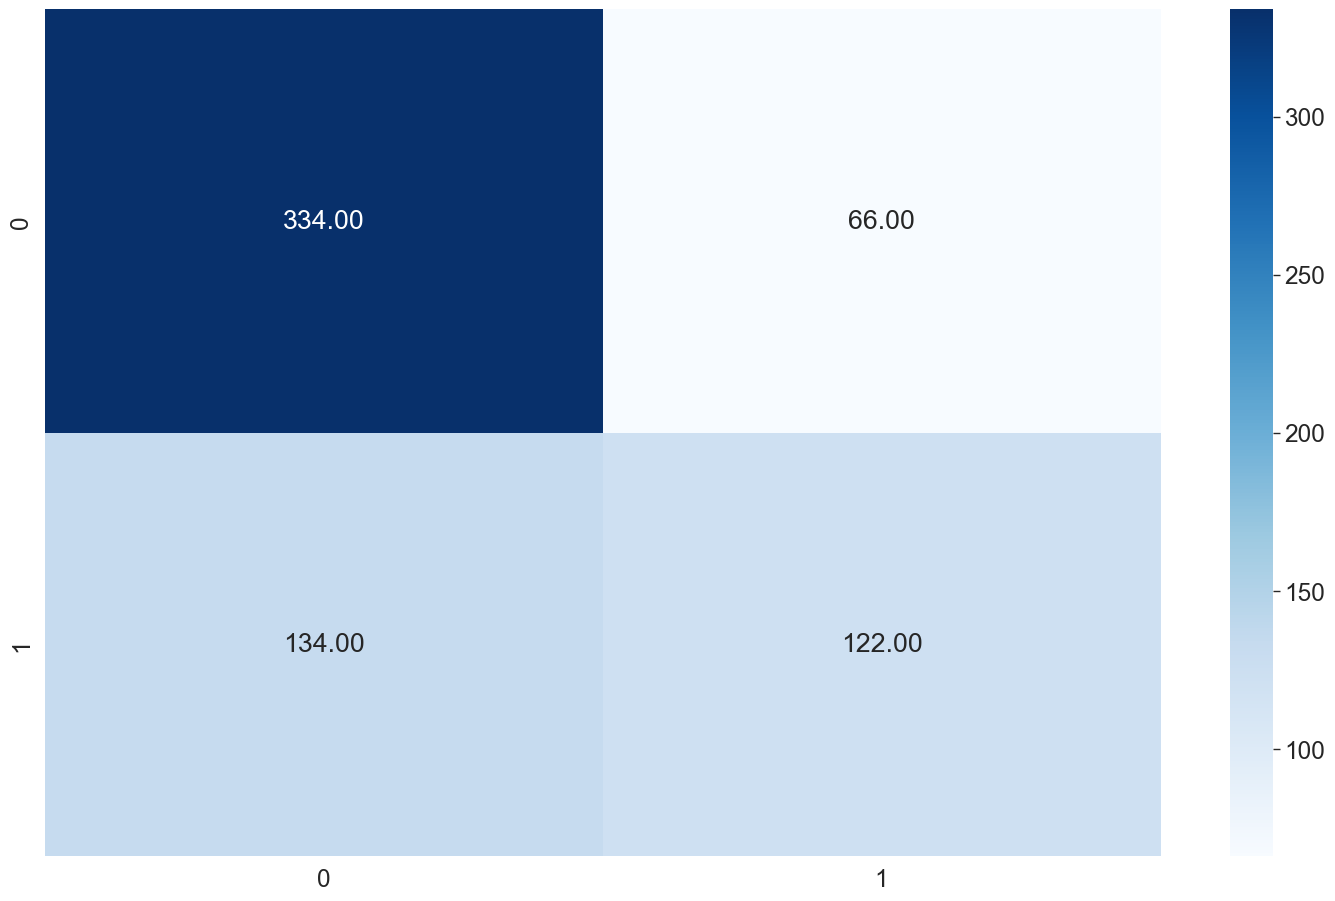

In [98]:
best_stacking_model_updated.fit(X_train_new,y_train_new)
pred = best_stacking_model_updated.predict(X_test_new)
print(classification_report(y_test_new, pred))
sns.heatmap(confusion_matrix(y_test_new, pred), annot=True, fmt='.2f', cmap="Blues")

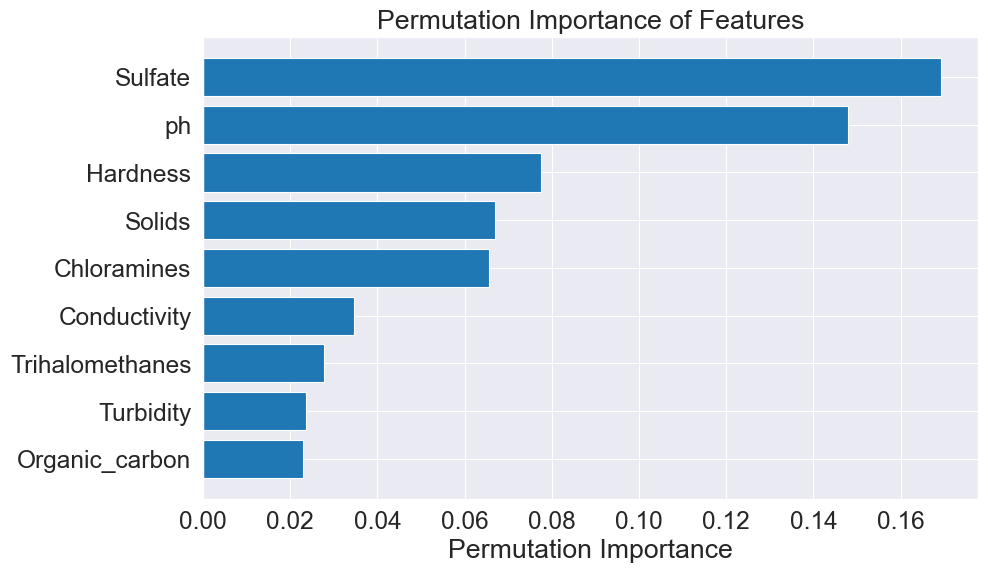

In [99]:
from sklearn.inspection import permutation_importance

perm_importance= permutation_importance(best_stacking_model_updated, X_train_new, y_train_new, n_repeats=10, random_state=42)

sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(10, 6))
plt.barh(range(X_test.shape[1]), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(X_test.shape[1]), [list(df1_new.columns)[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance of Features')
plt.show()

AUC: 0.65578125


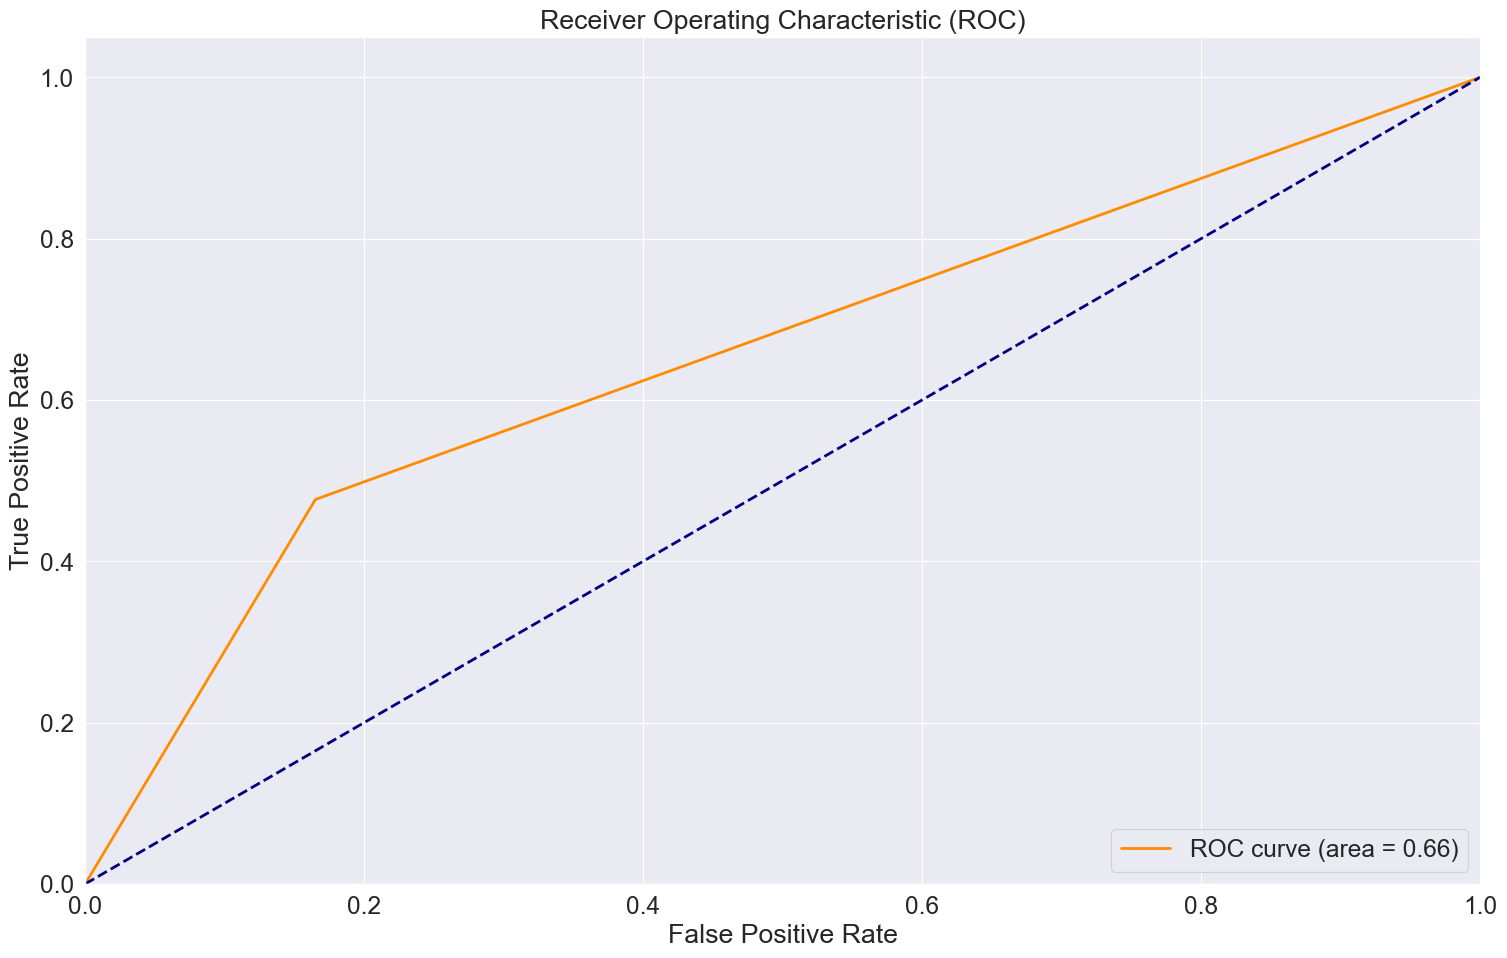

In [100]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_new, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

print("AUC:", roc_auc)
plt.show()

# DL models

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score

# Define the neural network model
ann_model = Sequential([
    Dense(units=128, activation='relu', input_dim=X_train_new.shape[1]),
    Dense(units=64, activation='relu'),
    Dense(units=48, activation='relu'),
    Dense(units=1, activation="sigmoid")
])

# Compile the model
ann_model.compile(optimizer='adam', loss="binary_crossentropy",metrics=['accuracy'])

# Train the model
ann_model.fit(X_train_new, y_train_new, epochs=20, batch_size=32, validation_data=(X_test_new, y_test_new), verbose=1)

# Predictions on the test set
y_pred = ann_model.predict(X_test_new) >= 0.5

accuracy_score(y_test_new, y_pred)

Epoch 1/20
82/82 [==============================] - 2s 8ms/step - loss: 0.6722 - accuracy: 0.6050 - val_loss: 0.6677 - val_accuracy: 0.6098
Epoch 2/20
82/82 [==============================] - 0s 3ms/step - loss: 0.6710 - accuracy: 0.6099 - val_loss: 0.6665 - val_accuracy: 0.6098
Epoch 3/20
82/82 [==============================] - 0s 3ms/step - loss: 0.6679 - accuracy: 0.6103 - val_loss: 0.6623 - val_accuracy: 0.6098
Epoch 4/20
82/82 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.6115 - val_loss: 0.6548 - val_accuracy: 0.6235
Epoch 5/20
82/82 [==============================] - 0s 3ms/step - loss: 0.6556 - accuracy: 0.6298 - val_loss: 0.6554 - val_accuracy: 0.6296
Epoch 6/20
82/82 [==============================] - 0s 3ms/step - loss: 0.6486 - accuracy: 0.6412 - val_loss: 0.6393 - val_accuracy: 0.6402
Epoch 7/20
82/82 [==============================] - 0s 3ms/step - loss: 0.6392 - accuracy: 0.6542 - val_loss: 0.6284 - val_accuracy: 0.6463
Epoch 8/20
82/82 [==

0.6753048780487805

## MLP and stacking MLPs

In [127]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-100, hidden_layer_sizes=(48, 24, 16), random_state=42, activation='tanh')
clf.fit(X_train_new, y_train_new)

MLPClassifier(activation='tanh', alpha=1e-100, hidden_layer_sizes=(48, 24, 16),
              random_state=42, solver='lbfgs')

In [125]:
pred = clf.predict(X_test_new)
print(classification_report(y_test_new, pred))
sns.heatmap(confusion_matrix(y_test_new, pred), annot=True, fmt='.2f', cmap='Blues')

              precision    recall  f1-score   support

         0.0       0.72      0.80      0.75       400
         1.0       0.61      0.51      0.56       256

    accuracy                           0.68       656
   macro avg       0.66      0.65      0.65       656
weighted avg       0.68      0.68      0.68       656



<Axes: >

In [135]:
from sklearn.neural_network import MLPClassifier

clf1 = MLPClassifier(solver='lbfgs', alpha=1e-100, hidden_layer_sizes=(48, 24, 16), random_state=42, activation='tanh')
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-150, hidden_layer_sizes=(64, 32, 16, 8), random_state=42, activation='tanh')
clf3 = MLPClassifier(solver='lbfgs', alpha=1e-200, hidden_layer_sizes=(128, 64, 32, 16), random_state=42, activation='tanh')
clf4 = MLPClassifier(solver='lbfgs', alpha=1e-250, hidden_layer_sizes=(32, 16, 8), random_state=42, activation='tanh')

base_cls = [('clf1', clf1), ('clf2', clf2), ('clf3', clf3), ('clf4', clf4)]
stack = StackingClassifier(estimators=base_cls, final_estimator=LogisticRegression(random_state=42), passthrough=True, n_jobs=-1)

In [136]:
stack.fit(X_train_new, y_train_new)

StackingClassifier(estimators=[('clf1',
                                MLPClassifier(activation='tanh', alpha=1e-100,
                                              hidden_layer_sizes=(48, 24, 16),
                                              random_state=42,
                                              solver='lbfgs')),
                               ('clf2',
                                MLPClassifier(activation='tanh', alpha=1e-150,
                                              hidden_layer_sizes=(64, 32, 16,
                                                                  8),
                                              random_state=42,
                                              solver='lbfgs')),
                               ('clf3',
                                MLPClassifier(activation='tanh', alpha=1e-200,
                                              hidden_layer_sizes=(128, 64, 32,
                                                                  16),
                                              random_state=42,
                                              solver='lbfgs')),
                               ('clf4',
                                MLPClassifier(activation='tanh', alpha=1e-250,
                                              hidden_layer_sizes=(32, 16, 8),
                                              random_state=42,
                                              solver='lbfgs'))],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1, passthrough=True)

              precision    recall  f1-score   support

         0.0       0.72      0.83      0.77       400
         1.0       0.65      0.49      0.56       256

    accuracy                           0.70       656
   macro avg       0.68      0.66      0.66       656
weighted avg       0.69      0.70      0.69       656



<Axes: >

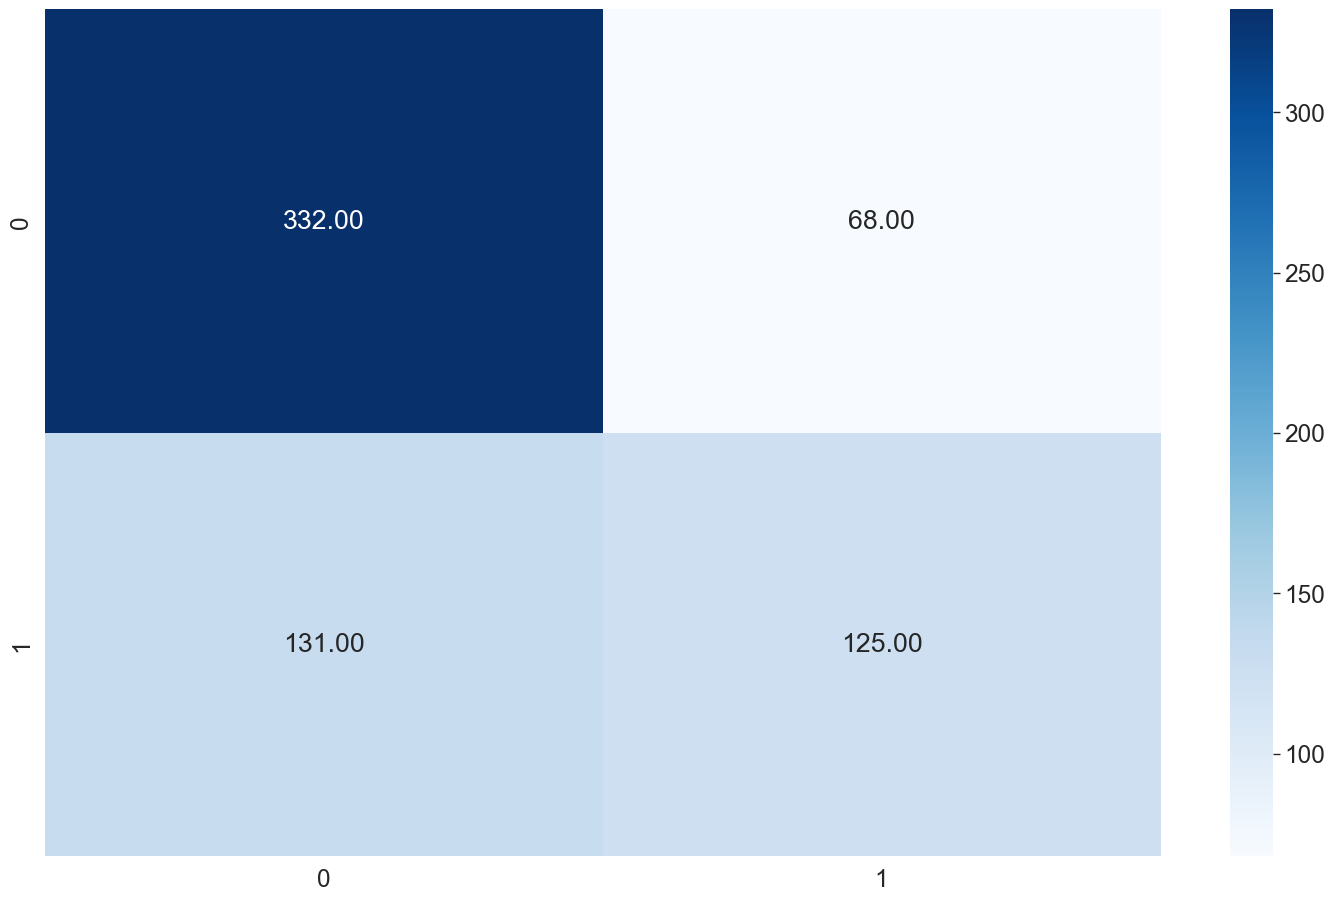

In [137]:
from sklearn.metrics import classification_report, confusion_matrix

pred = stack.predict(X_test_new)
print(classification_report(y_test_new, pred))
sns.heatmap(confusion_matrix(y_test_new, pred), annot=True, fmt='.2f', cmap='Blues')

AUC: 0.6591406249999999


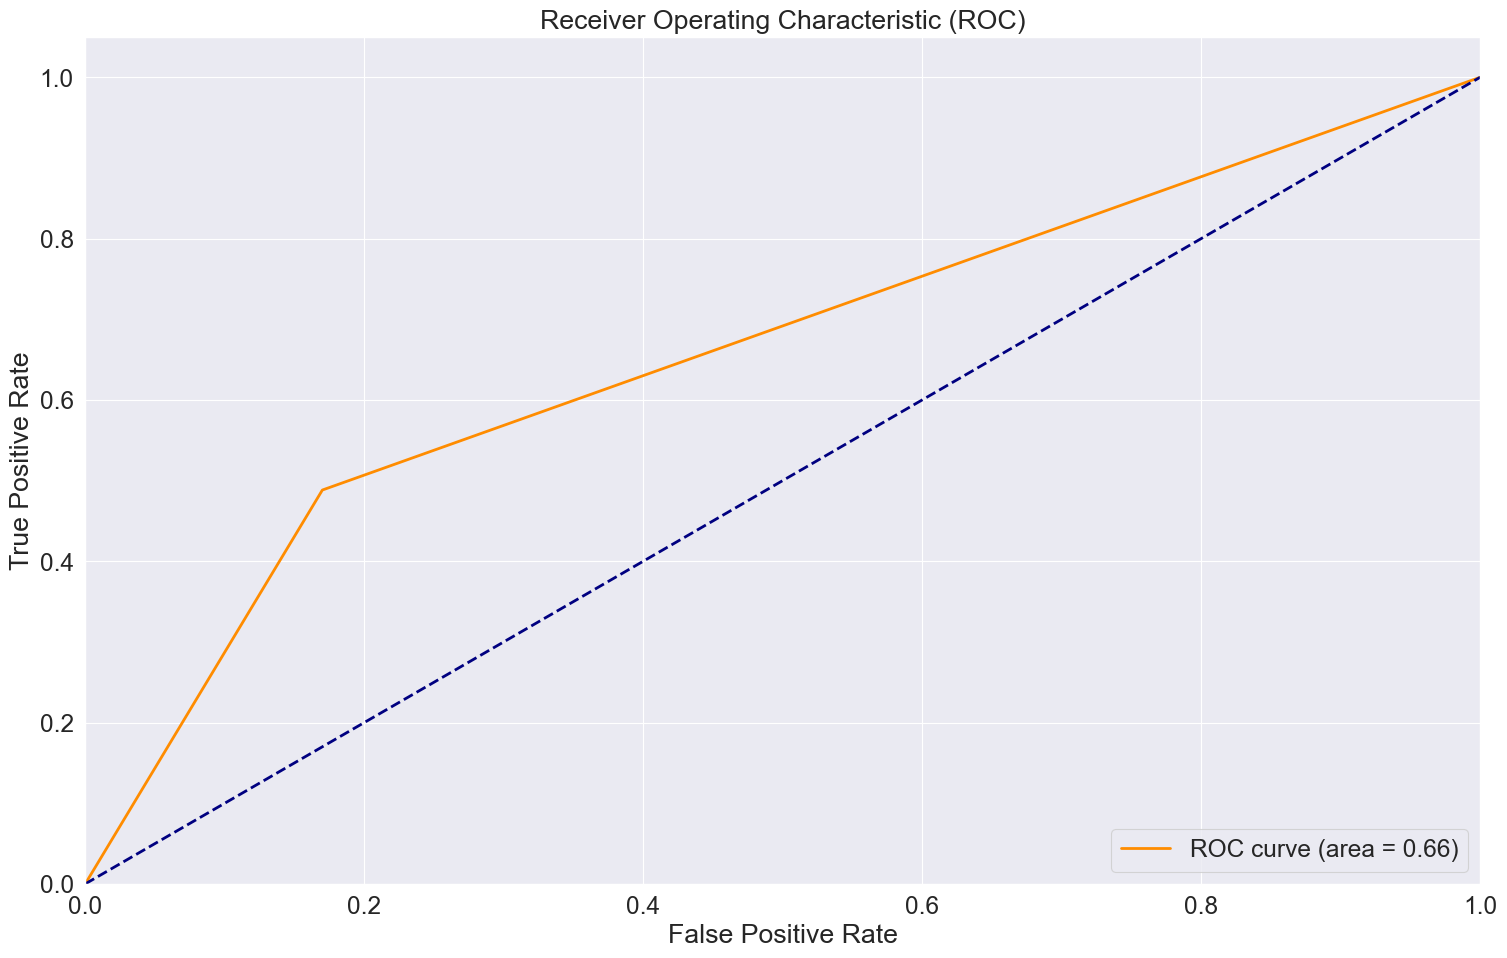

In [138]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_new, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

print("AUC:", roc_auc)
plt.show()

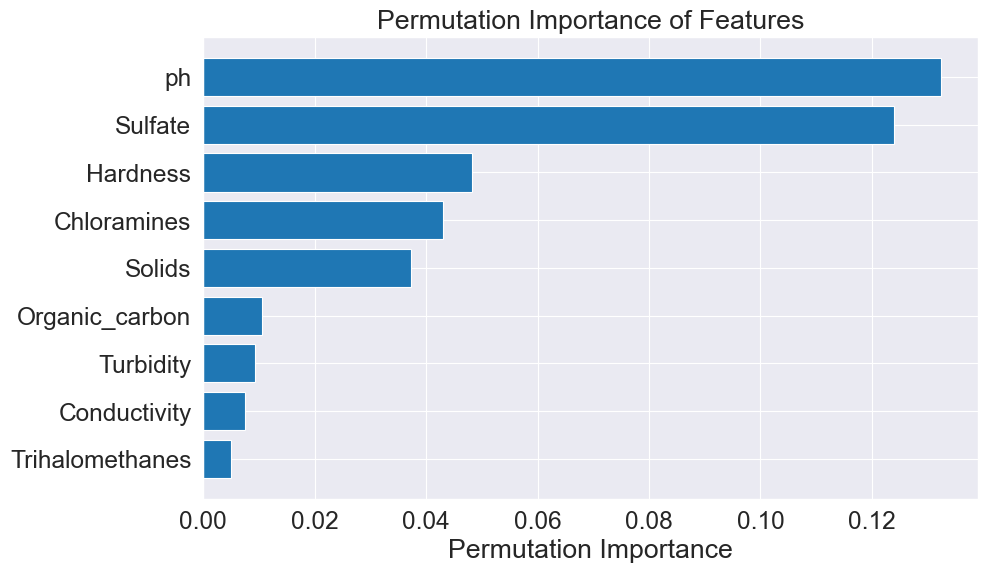

In [139]:
from sklearn.inspection import permutation_importance

perm_importance= permutation_importance(stack, X_train_new, y_train_new, n_repeats=10, random_state=42)

sorted_idx = perm_importance.importances_mean.argsort()

# Plot permutation importance
plt.figure(figsize=(10, 6))
plt.barh(range(X_test.shape[1]), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(X_test.shape[1]), [list(df1_new.columns)[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance of Features')
plt.show()